# Problem Statement

<p align="justify">Saat ini perusahaan E-commerce sedang dihadapkan dengan banyaknya customer yang memutuskan tidak kembali berbelanja, persentase customer yang berhenti berbelanja sebesar 17.07%, hal ini menyebabkan terjadi penurunan revenue dari E-commerce tersebut
<br>

# Business Question

1.Berapa persen customer yang memilih untuk churn ? <br>
2.Apakah jarak rumah customer dengan warehouse memiliki pengaruh terhadap churn? <br>
3.Apakah ada pengaruh antara tenure dengan persentase churn ? <br>
4.Bagaimana persentase churn dari tiap product yang dibeli customer ? <br>
5.Apakah customer yang complain akan menyebabkan customer memilih untuk churn ?



# Goals

1.Mengidentifikasi penyebab churn. <br>
2.Membangun machine learning untuk mendeteksi customer yang akan churn.<br>
3.Menurunkan Churn Rate

# Import Dataset

In [189]:
import pandas as pd
pd.set_option("display.max_columns",None)

import numpy as np
import seaborn as sns
sns.set_theme("notebook")
import matplotlib.pyplot as plt
import pickle
from scipy import stats
from scipy.stats import chi2_contingency

from sklearn.preprocessing import StandardScaler
import category_encoders as ce
from sklearn.feature_selection import RFECV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, GridSearchCV, cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold
from sklearn.cluster import KMeans

from sklearn.metrics import roc_auc_score, roc_curve, RocCurveDisplay, precision_recall_curve, PrecisionRecallDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from yellowbrick.classifier import DiscriminationThreshold 


import warnings
warnings.filterwarnings('ignore')

In [190]:
df = pd.read_excel("E Commerce.xlsx", sheet_name='E Comm', engine='openpyxl')
df.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0          159.93  
1                0.0          120.90  
2                3.0          120.28  
3                3.0          134.07  
4                3.0          129.60

# Data Understanding

In [191]:
# Data Quality Checking
df.shape

(5630, 20)

(5630, 20)

In [192]:
# Statistics description
df.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      5630.000000  5630.000000                  5365.000000  5374.000000   
mean          4.214032     0.284902                    15.707922     1.751023   
std           2.583586     0.451408                     3.675485     1.894621   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           6.000000     1.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  5372.000000        5323.000000     5630.000000  
mean      3.008004           4.543491      177.223030  
std       2.939680           3.654433       49.207036  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      145.770000  
50%       2.000000           3.000000      163.280000  
75%       3.000000           7.000000      196.392500  
max      16.000000          46.000000      324.990000

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      5630.000000  5630.000000                  5365.000000  5374.000000   
mean          4.214032     0.284902                    15.707922     1.751023   
std           2.583586     0.451408                     3.675485     1.894621   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           6.000000     1.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  5372.000000        5323.000000     5630.000000  
mean      3.008004           4.543491      177.223030  
std       2.939680           3.654433       49.207036  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      145.770000  
50%       2.000000           3.000000      163.280000  
75%       3.000000           7.000000      196.392500  
max      16.000000          46.000000      324.990000

# Data Cleaning

In [193]:
# Missing value percentage
round(((df.isnull().sum()/(df.shape[0]))*100),2)

CustomerID                     0.00
Churn                          0.00
Tenure                         4.69
PreferredLoginDevice           0.00
CityTier                       0.00
WarehouseToHome                4.46
PreferredPaymentMode           0.00
Gender                         0.00
HourSpendOnApp                 4.53
NumberOfDeviceRegistered       0.00
PreferedOrderCat               0.00
SatisfactionScore              0.00
MaritalStatus                  0.00
NumberOfAddress                0.00
Complain                       0.00
OrderAmountHikeFromlastYear    4.71
CouponUsed                     4.55
OrderCount                     4.58
DaySinceLastOrder              5.45
CashbackAmount                 0.00
dtype: float64

CustomerID                     0.00
Churn                          0.00
Tenure                         4.69
PreferredLoginDevice           0.00
CityTier                       0.00
WarehouseToHome                4.46
PreferredPaymentMode           0.00
Gender                         0.00
HourSpendOnApp                 4.53
NumberOfDeviceRegistered       0.00
PreferedOrderCat               0.00
SatisfactionScore              0.00
MaritalStatus                  0.00
NumberOfAddress                0.00
Complain                       0.00
OrderAmountHikeFromlastYear    4.71
CouponUsed                     4.55
OrderCount                     4.58
DaySinceLastOrder              5.45
CashbackAmount                 0.00
dtype: float64

## Duplicated Data

In [194]:
# Data Duplicated
df.duplicated().sum()

0

0

In [195]:
#splitting data
X = df.drop("Churn",axis=1).copy()
y= df["Churn"].copy()

X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.3,random_state=42)

X_train["Churn"]=y_train

## Features Distribution

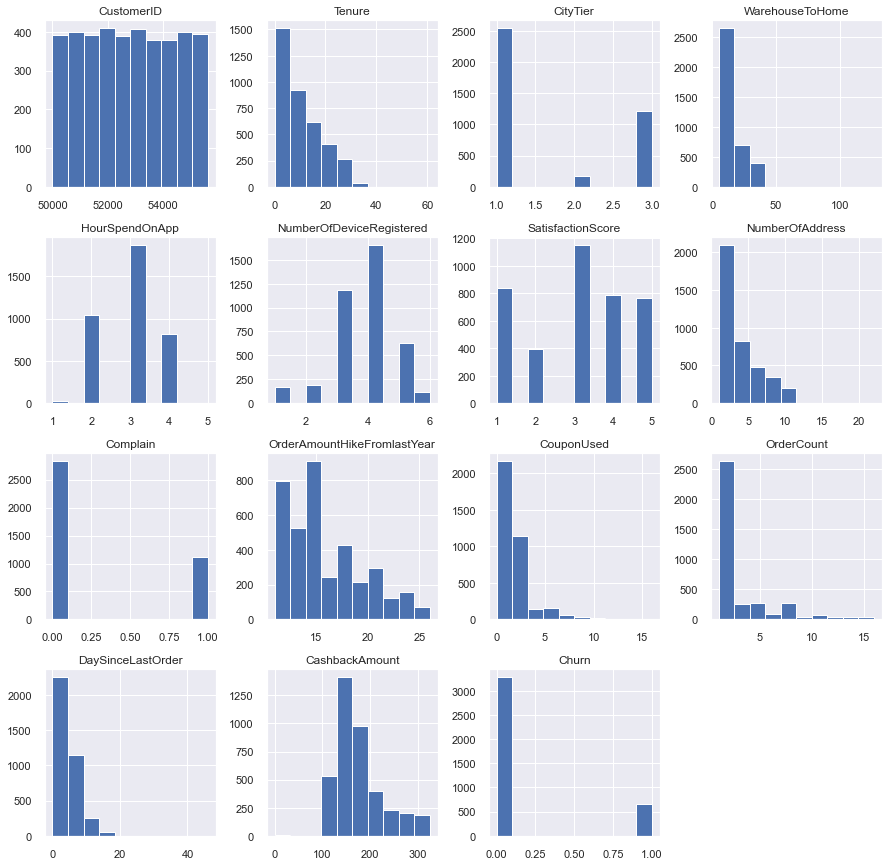

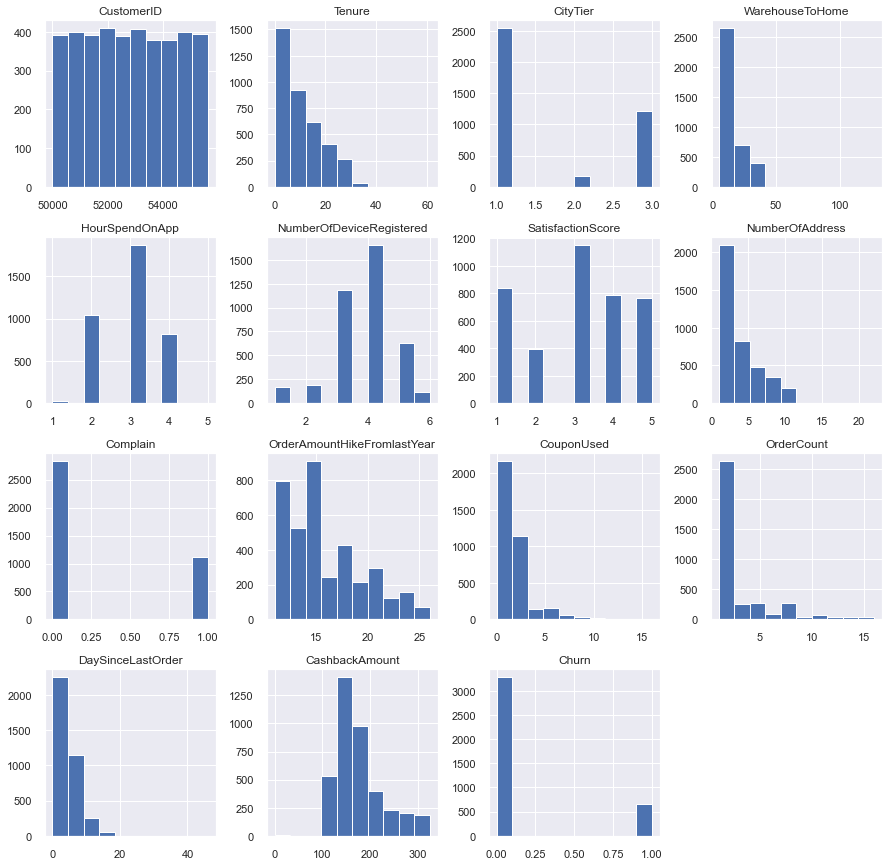

In [196]:
X_train.hist(bins=10,figsize=(15,15));

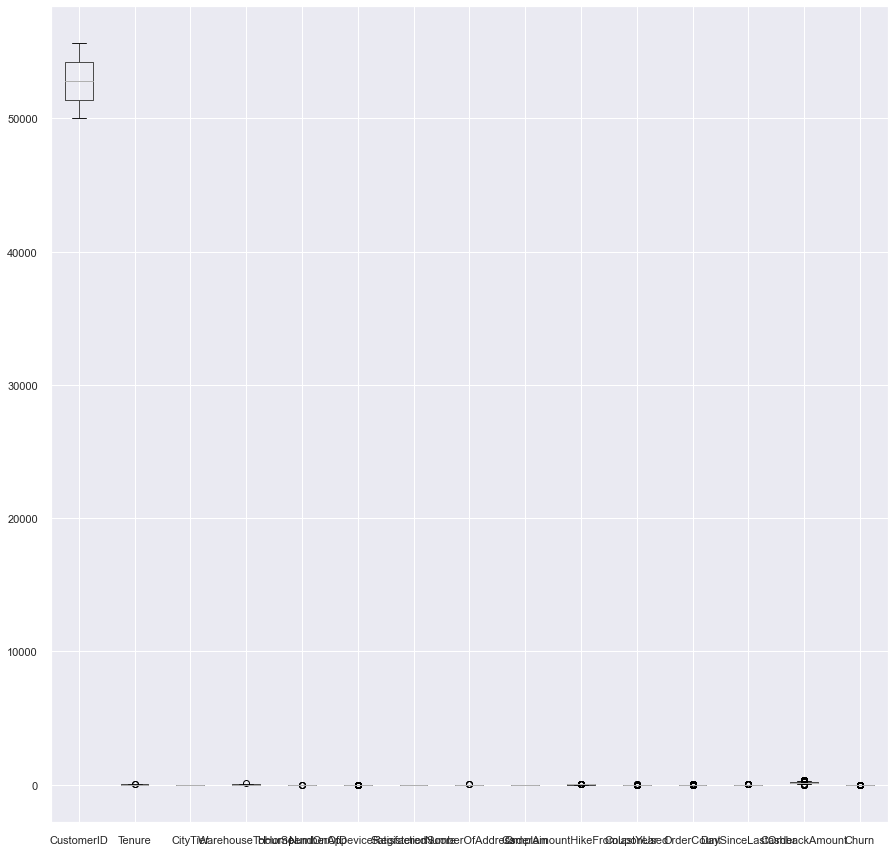

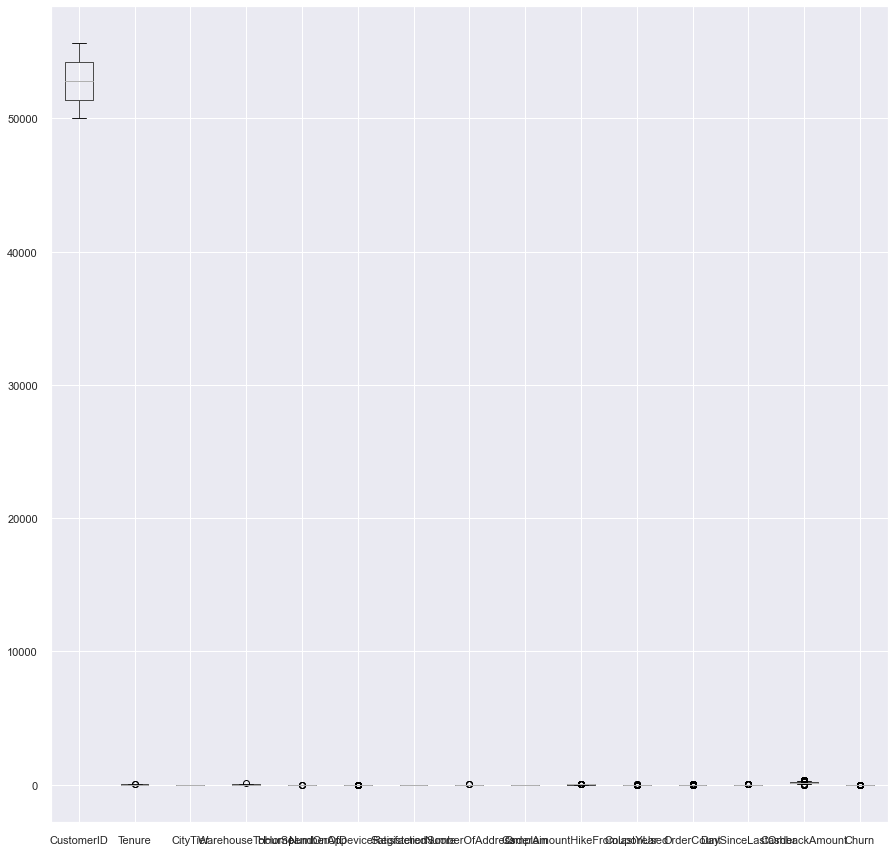

In [197]:
X_train.boxplot(figsize=(15,15));

## Handling Missing Values

Pemilihan imputation dengan median karna data median dengan mean tidak terlalu jauh dan juga ketika melihat di boxplot tidak memungkinkan menggunakan mean karna mean sangat berpengaruh dengan outlier yang menyebabkan hasil mean akan sangat jauh dan berpengaruh ke dalam pembuatan model.

In [198]:
# missing values imputation
num_columns = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear','CouponUsed', 'OrderCount', 'DaySinceLastOrder']

for column in num_columns:
    X_train.loc[X_train[column].isnull(), column] = X_train[column].median()

X_train.isnull().sum()

CustomerID                     0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
Churn                          0
dtype: int64

CustomerID                     0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
Churn                          0
dtype: int64

In [199]:
# Convert data type to integer 
X_train['HourSpendOnApp'] = X_train['HourSpendOnApp'].astype(int)
X_train['Tenure'] = X_train['Tenure'].astype(int)
X_train['OrderAmountHikeFromlastYear'] = X_train['OrderAmountHikeFromlastYear'].astype(int)
X_train['CouponUsed'] = X_train['CouponUsed'].astype(int)
X_train['OrderCount'] = X_train['OrderCount'].astype(int)
X_train['DaySinceLastOrder'] = X_train['DaySinceLastOrder'].astype(int)
X_train["WarehouseToHome"] = X_train["WarehouseToHome"].astype(int)

In [200]:
X_train.dtypes

CustomerID                       int64
Tenure                           int32
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                  int32
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                   int32
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear      int32
CouponUsed                       int32
OrderCount                       int32
DaySinceLastOrder                int32
CashbackAmount                 float64
Churn                            int64
dtype: object

CustomerID                       int64
Tenure                           int32
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                  int32
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                   int32
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear      int32
CouponUsed                       int32
OrderCount                       int32
DaySinceLastOrder                int32
CashbackAmount                 float64
Churn                            int64
dtype: object

## Inconsistent Data

In [201]:
# Check inconsistent data
for col in X_train.columns:
       print("=="*10)
       print(f" {col}", X_train[col].unique())

 CustomerID [51187 53146 50609 ... 51385 54027 52762]
 Tenure [ 9  7  0 18 16  1 11  4 12 19 14 10 13 22  3 21  6 27 28 23  2 26 15  5
 29  8 25 30 24 20 17 31 61 50]
 PreferredLoginDevice ['Computer' 'Mobile Phone' 'Phone']
 CityTier [1 3 2]
 WarehouseToHome [ 20   7   8  12   9  32  29  18  14  10  23   6  31  16  15  13  11  24
  36  17  34  30  33  28  25  26  21  19  22  35  27   5 127]
 PreferredPaymentMode ['Credit Card' 'Debit Card' 'COD' 'E wallet' 'UPI' 'Cash on Delivery' 'CC']
 Gender ['Female' 'Male']
 HourSpendOnApp [2 4 3 1 5]
 NumberOfDeviceRegistered [3 1 5 4 2 6]
 PreferedOrderCat ['Mobile Phone' 'Grocery' 'Laptop & Accessory' 'Others' 'Mobile' 'Fashion']
 SatisfactionScore [3 2 5 1 4]
 MaritalStatus ['Single' 'Married' 'Divorced']
 NumberOfAddress [ 2  6  5  7 10  1  4  3 11  8  9 20 21 22]
 Complain [0 1]
 OrderAmountHikeFromlastYear [16 20 12 15 14 11 21 18 23 13 19 17 22 26 24 25]
 CouponUsed [ 1  2  0  6  3  7  4  5  8  9 12 13 10 16 14 11 15]
 OrderCount [ 1  2  

In [202]:
# Merubah PreferredPaymentMode dri CreditCard jadi CC
X_train['PreferredPaymentMode'] = X_train['PreferredPaymentMode'].replace({'Credit Card':'CC'})

# Merubah PreferredPaymentMode dri Cash On Delivery jadi COD
X_train['PreferredPaymentMode'] = X_train['PreferredPaymentMode'].replace({'Cash on Delivery':'COD'})

# Merubah PreferedOrderCat Device dri Phone jadi Mobile Phone
X_train['PreferedOrderCat'] = X_train['PreferedOrderCat'].replace({'Mobile':'Mobile Phone'})

# Merubah Login Device dri Phone jadi Mobile Phone
X_train['PreferredLoginDevice'] = X_train['PreferredLoginDevice'].replace({'Phone':'Mobile Phone'})

#check data set dengan melihat 5 baris pertama
X_train.head()

CustomerID  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
1186       51187       9             Computer         1               20   
3145       53146       7         Mobile Phone         1                7   
608        50609       0         Mobile Phone         1                8   
5202       55203      18             Computer         1               12   
4133       54134      16         Mobile Phone         1                9   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
1186                   CC  Female               2                         3   
3145                   CC  Female               4                         3   
608                    CC    Male               2                         1   
5202           Debit Card    Male               3                         5   
4133           Debit Card    Male               3                         4   

        PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
1186        Mobile Phone                  3        Single                2   
3145             Grocery                  3       Married                6   
608   Laptop & Accessory                  2      Divorced                2   
5202        Mobile Phone                  3        Single                5   
4133              Others                  3       Married                7   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
1186         0                           16           1           1   
3145         0                           20           1           2   
608          0                           12           1           1   
5202         0                           15           1           2   
4133         0                           15           2           5   

      DaySinceLastOrder  CashbackAmount  Churn  
1186                  0          115.14      0  
3145                  6          286.84      0  
608                   3          154.72      0  
5202                  4          156.62      0  
4133                 15          313.80      0

CustomerID  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
1186       51187       9             Computer         1               20   
3145       53146       7         Mobile Phone         1                7   
608        50609       0         Mobile Phone         1                8   
5202       55203      18             Computer         1               12   
4133       54134      16         Mobile Phone         1                9   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
1186                   CC  Female               2                         3   
3145                   CC  Female               4                         3   
608                    CC    Male               2                         1   
5202           Debit Card    Male               3                         5   
4133           Debit Card    Male               3                         4   

        PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
1186        Mobile Phone                  3        Single                2   
3145             Grocery                  3       Married                6   
608   Laptop & Accessory                  2      Divorced                2   
5202        Mobile Phone                  3        Single                5   
4133              Others                  3       Married                7   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
1186         0                           16           1           1   
3145         0                           20           1           2   
608          0                           12           1           1   
5202         0                           15           1           2   
4133         0                           15           2           5   

      DaySinceLastOrder  CashbackAmount  Churn  
1186                  0          115.14      0  
3145                  6          286.84      0  
608                   3          154.72      0  
5202                  4          156.62      0  
4133                 15          313.80      0

# handling Outliers

In [203]:
X_train.select_dtypes('number').columns

Index(['CustomerID', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'Churn'],
      dtype='object')

Index(['CustomerID', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'Churn'],
      dtype='object')

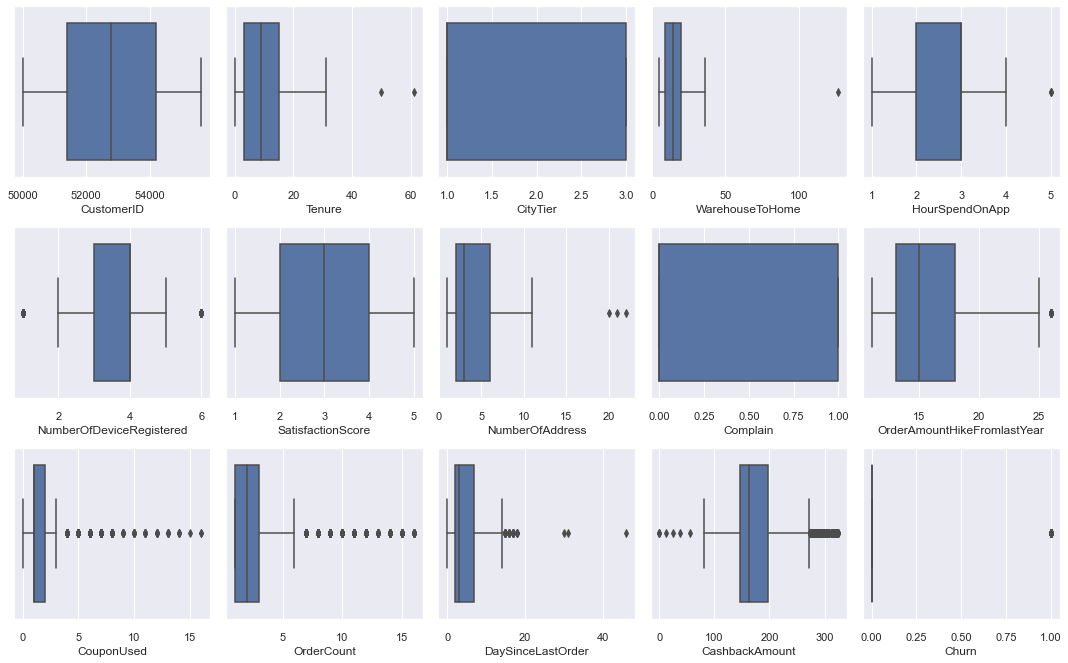

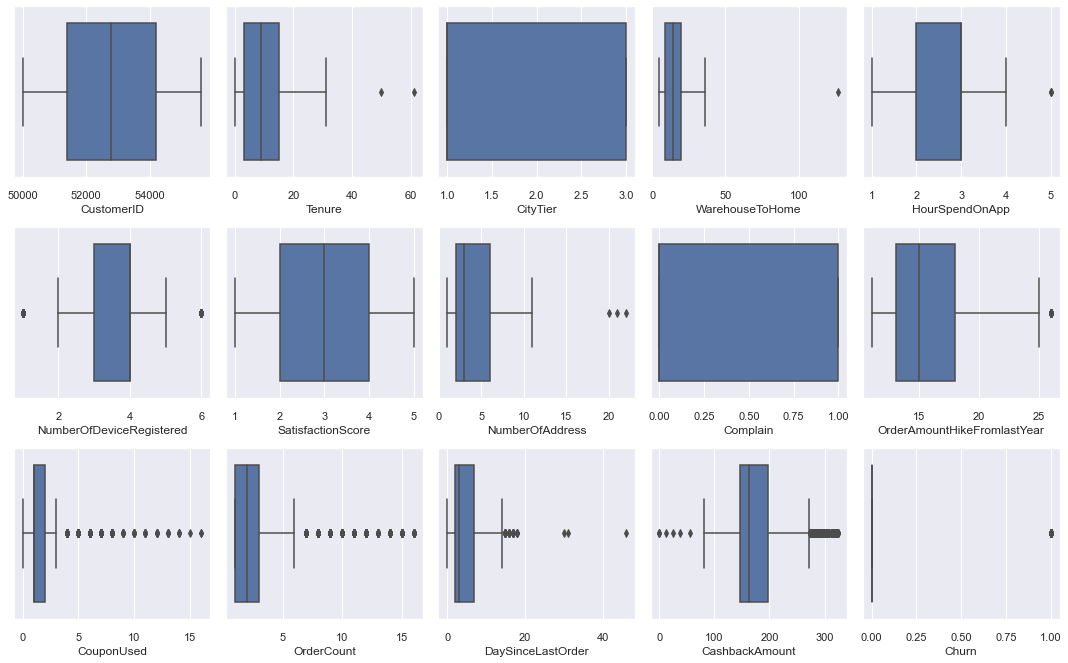

In [204]:
# outliers check using boxplot
num = X_train.select_dtypes('number').columns

plt.figure(figsize=(15,15))
for i in range(0,len(num)):
    plt.subplot(5,len(num)//3,i+1)
    sns.boxplot(data=X_train,x=X_train[num[i]])
    plt.tight_layout();

Terdapat nilai ekstreme atau outliers pada data. Maka kita gunakan zscore untuk menghilangkan data outliers tersebut.

In [205]:
# z-score
z = np.abs(stats.zscore(X_train[num]))

print("Data shape sebelum di hilangkan outliers {}".format(X_train.shape))

#handling outliers menggunakan z_score dengan treshold = 3
X_train= X_train[(z < 3).all(axis=1)]

#mengubah nilai outliers pada Hour spend on App menjadi nilai quantile 99%
X_train["HourSpendOnApp"].values[X_train["HourSpendOnApp"].values>4]=4

print("Data shape setelah handling outliers {}".format(X_train.shape))

Data shape sebelum di hilangkan outliers (3941, 20)
Data shape setelah handling outliers (3755, 20)
Data shape sebelum di hilangkan outliers (3941, 20)
Data shape setelah handling outliers (3755, 20)


Setelah dilakukan handling outliers, data bersisa 3755 row dari 3941 row sebelum outliers dibuang atau data yang dibuang sebanyak 300 row, sehingga dataset masih mengandung informasi sebesar 95%. Sehingga penanganan outliers dengan menggunakan metode z score dan capping tidak banyak membuang informasi pada dataset

# Exploratory Data Analysis

In [206]:
#separated numeric and categorical column
num = X_train.select_dtypes(include=["number"]).columns

cat = X_train.select_dtypes(include=["object"]).columns

print(num)
print("\n")
print(cat)

Index(['CustomerID', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'Churn'],
      dtype='object')


Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')
Index(['CustomerID', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'Churn'],
      dtype='object')


Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')


## Numeric

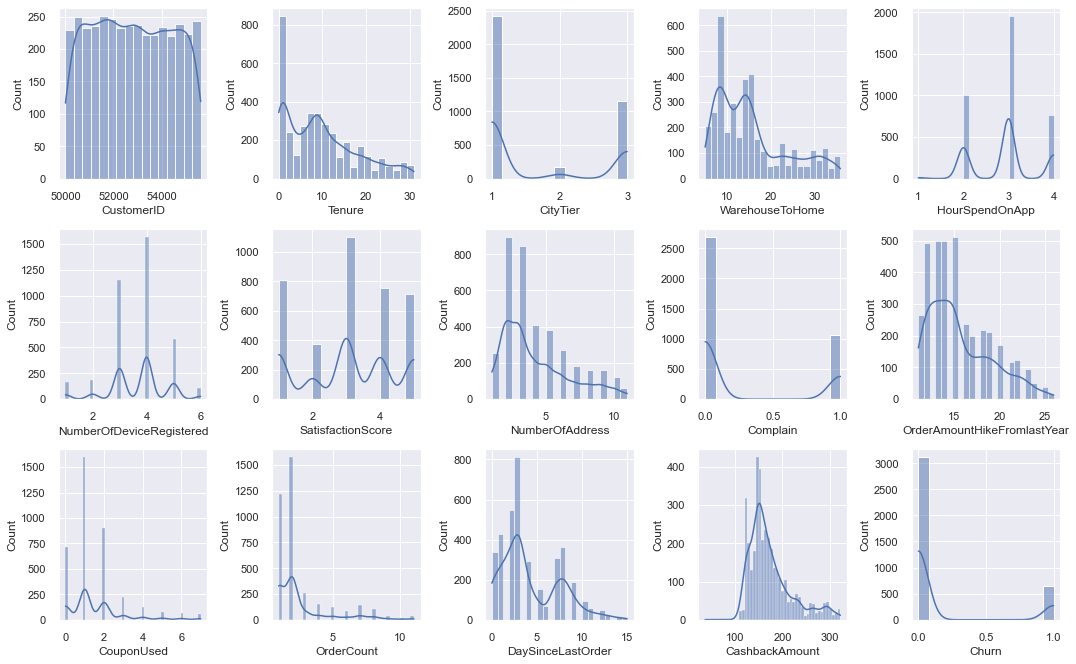

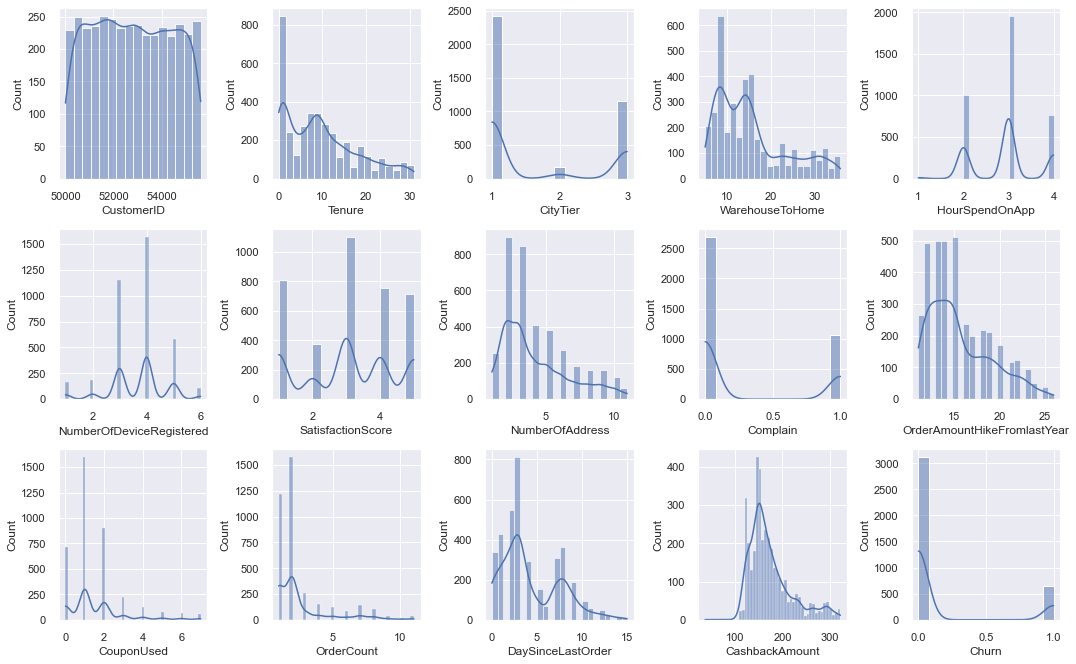

In [207]:
# histogram check
plt.figure(figsize=(15,15))
for i in range(0,len(num)):
    plt.subplot(5,len(num)//3,i+1)
    sns.histplot(data=X_train,x=X_train[num[i]],kde=True)
    plt.tight_layout();

Banyak kolom yang memiliki skew kanan dan skew kiri.

### Proportion Customer Churn  

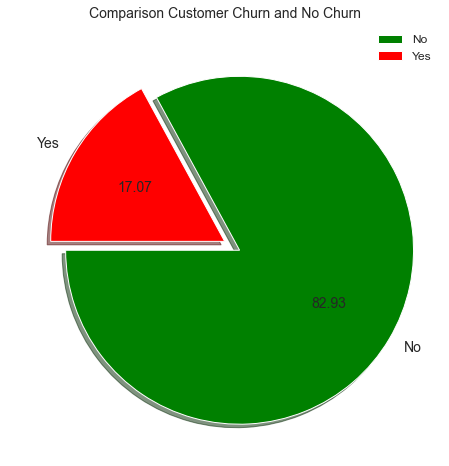

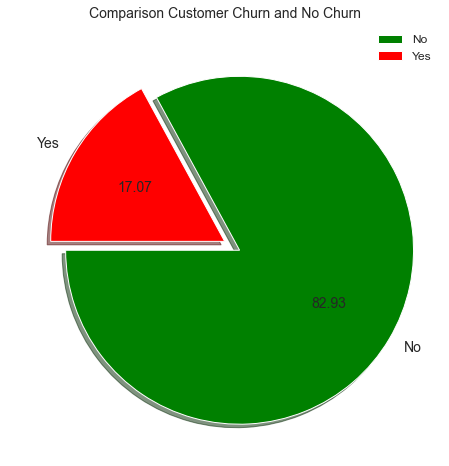

In [208]:
#check proportion of Churn
plt.figure(figsize=(10,8))
plt.pie(X_train["Churn"].value_counts(),autopct='%.2f',explode=[0.1,0],
        labels=["No","Yes"],shadow=True,textprops={'fontsize': 14},
       colors=["green","red"],startangle=180)
plt.title("Comparison Customer Churn and No Churn",fontsize=14)
plt.legend(fontsize=12,loc="upper right")
plt.show()

Customer yang mengalami churn dari perusahaan adalah sebesar 17.05%.

## Categorical Features

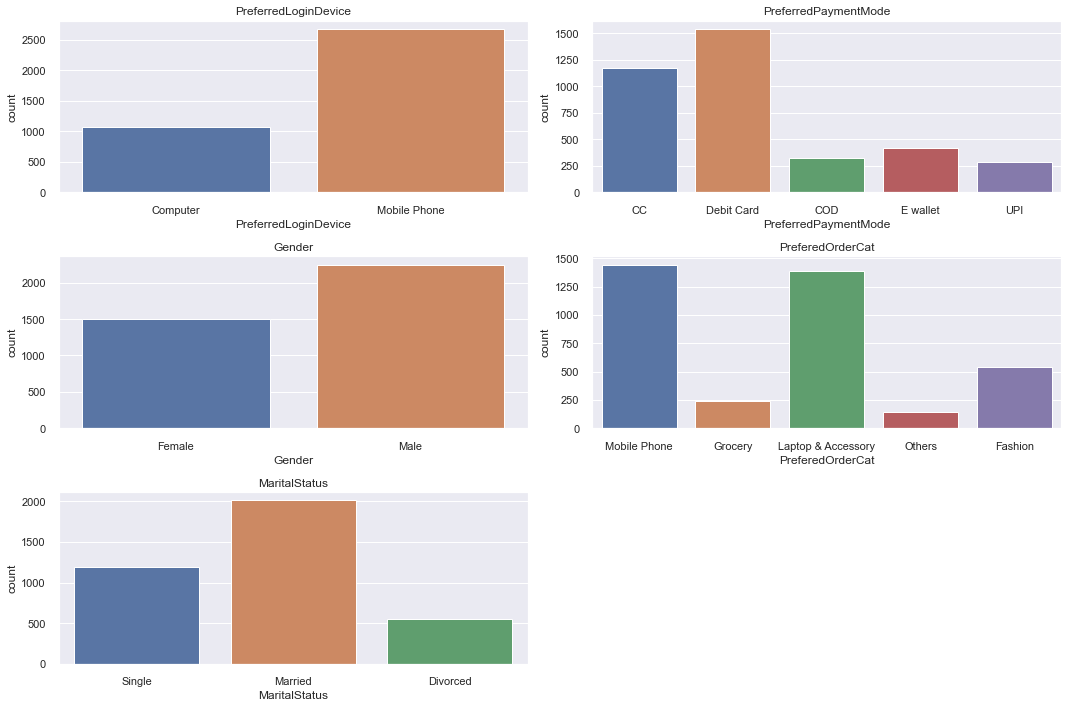

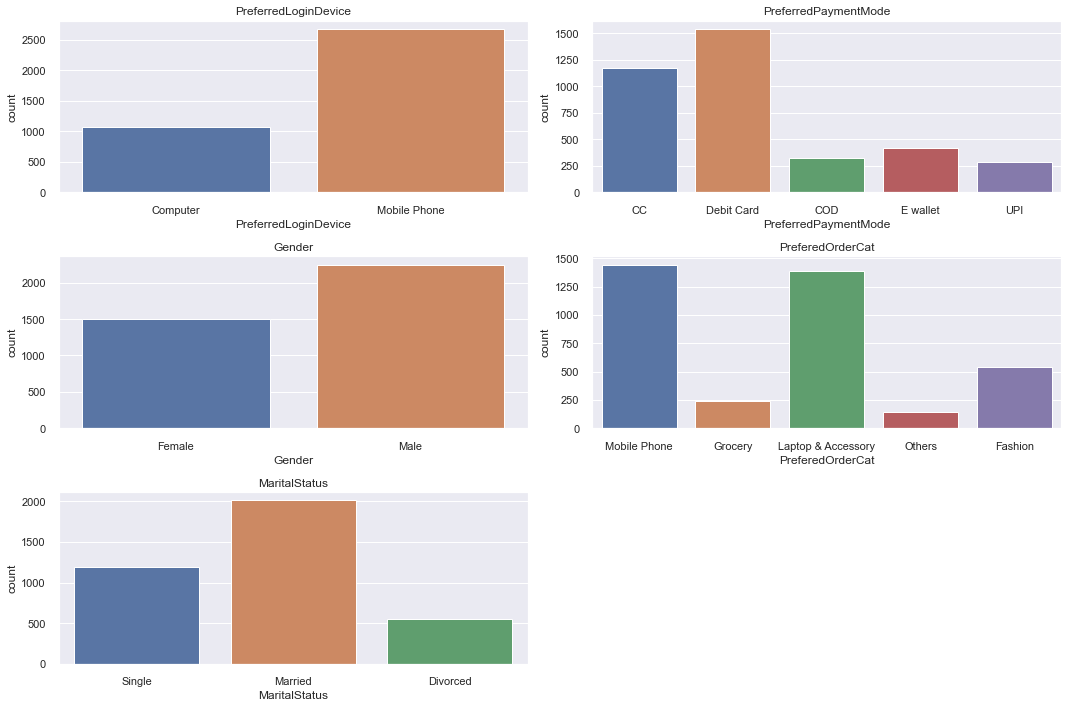

In [209]:
# Categorical features check
plt.figure(figsize=(15,10))
for i in range(0,len(cat)):
    plt.subplot(3,len(cat)//2,i+1)
    sns.countplot(data=X_train,x=X_train[cat[i]]).set_title(cat[i])
    plt.tight_layout();

Dari variable categoric didapatkan informasi: <br>
1. Customer yang menggunakan Mobile phone untuk login lebih banyak dibandingkan menggunakan computer. <br>
2. Customer yang melakukan pembayaran via debit card lebih banyak disusul dengan menggunakan Credit card. <br>
3. Customer berjenis kelamin laki-laki lebih banyak dibandingkan dengan perempuan. <br>
4. Laptop&Accessory, dan mobile phone adalah yang paling banyak dibeli oleh customer. <br>
5. Customer yang telah berstatus menikah lebih banyak dari pada lajang dan cerai.

In [210]:
# Create average cashback per order
X_train['avg_cashback_per_order'] = X_train['CashbackAmount']/X_train['OrderCount']

### Tingkat Churn Rate Berdasarkan Gender

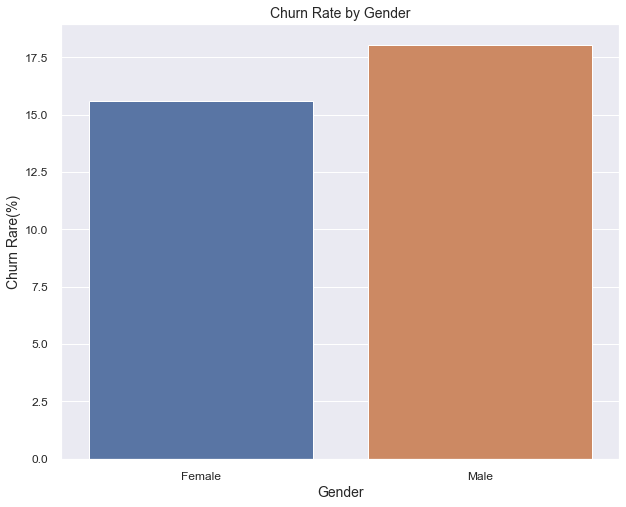

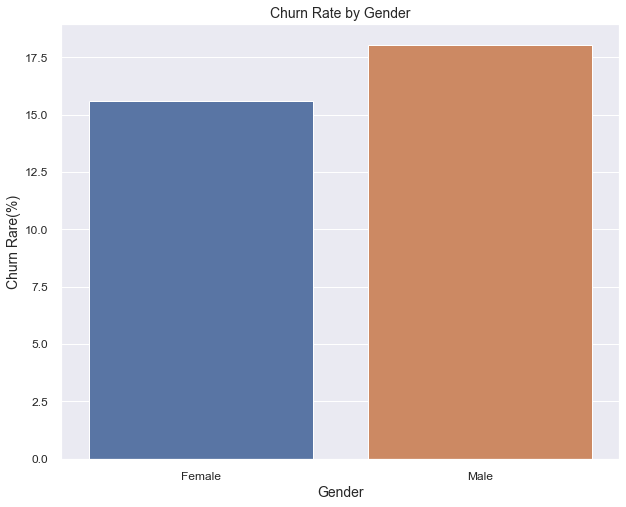

In [211]:
#churn rate by gender
churn_gender = X_train.groupby("Gender",as_index=False)['Churn'].mean()
churn_gender["Churn"] = churn_gender["Churn"]*100

#visulisasi
plt.figure(figsize=(10,8))
sns.barplot(data=churn_gender,x="Gender",y="Churn")
plt.title("Churn Rate by Gender",fontsize=14)
plt.xlabel("Gender",fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Churn Rare(%)",fontsize=14)
plt.yticks(fontsize=12)
plt.show()

persentase churn tertinggi berasal dari gender pria sebesar 17.5% dari total churn male

In [212]:
#uji chi square
gender_chi_test = pd.crosstab(X_train.Gender,X_train.Churn)

#uji hipothesis
Ho = "Gender not have correlation with churn"
H1= "Gender have correlation with churn"

c, p, dof, expected = chi2_contingency(gender_chi_test)

if p<0.05:
    print(H1,"as p value than 0.05, p value is {}".format(p))
else:
    print(Ho,"as p value more than 0.05, p value is {}".format(p))

Gender not have correlation with churn as p value more than 0.05, p value is 0.054245555490042445
Gender not have correlation with churn as p value more than 0.05, p value is 0.054245555490042445


dari hasil uji chi square test antara gender dan churn,  perbandingan churn terhadap gender tidak berdebda signifikan

### Tingkat Churn pada Tenure

In [213]:
#cohort analysis

#yes churn
yes_churn = X_train.groupby(["Churn","Tenure"]).count().transpose()[1]

#no churn
no_churn = X_train.groupby(["Churn","Tenure"]).count().transpose()[0]

#churn rate
churn_rate = 100*yes_churn/(yes_churn+no_churn)
churn_rate = churn_rate.T["CustomerID"].dropna()

#membuat dataframe
tenure_churn = pd.DataFrame(churn_rate).reset_index().rename(columns={"CustomerID":"Churn Rate"})

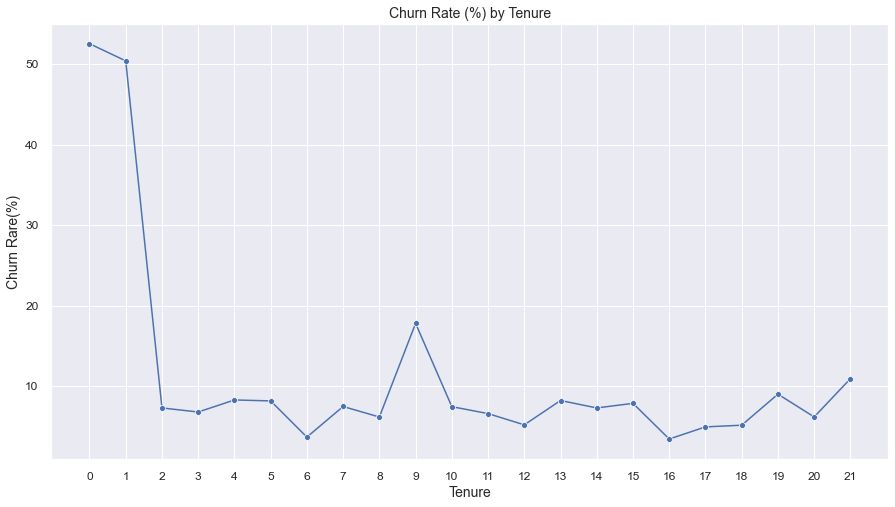

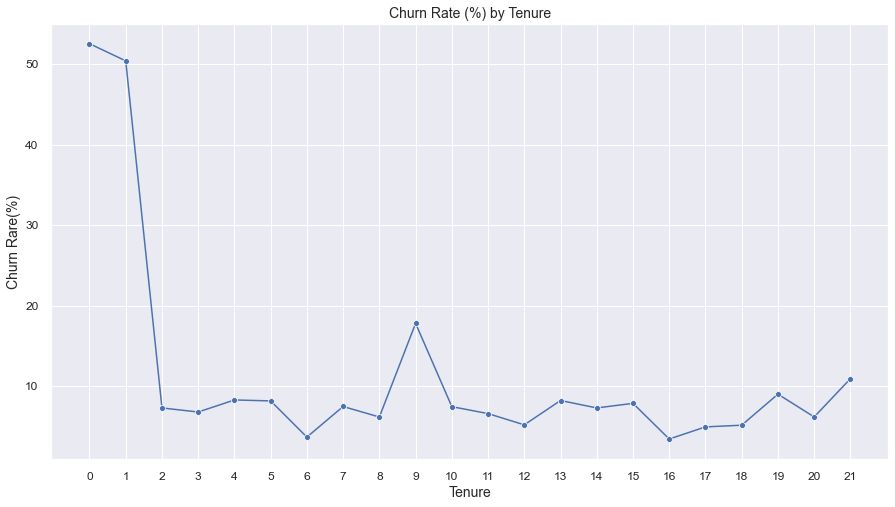

In [214]:
#visualisasi
plt.figure(figsize=(15,8))
sns.lineplot(data=tenure_churn,x="Tenure",y="Churn Rate",marker="o")
plt.title("Churn Rate (%) by Tenure",fontsize=14)
plt.xlabel("Tenure",fontsize=14)
plt.xticks(tenure_churn["Tenure"].values,fontsize=12)
plt.ylabel("Churn Rare(%)",fontsize=14)
plt.yticks(fontsize=12)
plt.show()

adanya hubungan antara tenur dan persentese churn, dimana ketika tenure customer lebih lama, persentase churn mengalamai penurunan. persentase churn tertinggi pada tenure 0 dan 1 kemudian mengalami penurunan ketika tenure customer meningkat. jika dapat mempertahakan customer dengan waktu yang lama akan menyebabkan dampak pada penurunan churn rate.

In [215]:
#membuat klasifikasi tenure menjadi 0-12 bulan, 12-24 bulan dan >24 bulan
def cohort(tenure):
    if tenure <13:
        return "0-12 months"
    elif tenure < 25:
        return "12-24 months"
    else:
        return ">24 months"

In [216]:
X_train["Tenure_Categoric"] = X_train["Tenure"].apply(cohort)
X_train

CustomerID  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
1186       51187       9             Computer         1               20   
3145       53146       7         Mobile Phone         1                7   
608        50609       0         Mobile Phone         1                8   
5202       55203      18             Computer         1               12   
4133       54134      16         Mobile Phone         1                9   
...          ...     ...                  ...       ...              ...   
1916       51917       0             Computer         1                6   
5038       55039      16             Computer         2                9   
1384       51385       6             Computer         3                6   
4026       54027      29         Mobile Phone         1                9   
2761       52762      11         Mobile Phone         3                7   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
1186                   CC  Female               2                         3   
3145                   CC  Female               4                         3   
608                    CC    Male               2                         1   
5202           Debit Card    Male               3                         5   
4133           Debit Card    Male               3                         4   
...                   ...     ...             ...                       ...   
1916           Debit Card  Female               3                         5   
5038                   CC    Male               4                         2   
1384           Debit Card  Female               2                         1   
4026                  COD    Male               4                         5   
2761           Debit Card    Male               2                         3   

        PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
1186        Mobile Phone                  3        Single                2   
3145             Grocery                  3       Married                6   
608   Laptop & Accessory                  2      Divorced                2   
5202        Mobile Phone                  3        Single                5   
4133              Others                  3       Married                7   
...                  ...                ...           ...              ...   
1916        Mobile Phone                  1       Married                4   
5038  Laptop & Accessory                  5       Married                9   
1384  Laptop & Accessory                  5       Married                3   
4026        Mobile Phone                  1       Married               10   
2761  Laptop & Accessory                  4       Married                1   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
1186         0                           16           1           1   
3145         0                           20           1           2   
608          0                           12           1           1   
5202         0                           15           1           2   
4133         0                           15           2           5   
...        ...                          ...         ...         ...   
1916         0                           14           2           2   
5038         0                           17           2           2   
1384         0                           19           0           1   
4026         0                           21           1           2   
2761         0                           15           1           5   

      DaySinceLastOrder  CashbackAmount  Churn  avg_cashback_per_order  \
1186                  0          115.14      0                  115.14   
3145                  6          286.84      0                  143.42   
608                   3          154.72      0                  154.72   
5202                  4          156.62      0            

CustomerID  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
1186       51187       9             Computer         1               20   
3145       53146       7         Mobile Phone         1                7   
608        50609       0         Mobile Phone         1                8   
5202       55203      18             Computer         1               12   
4133       54134      16         Mobile Phone         1                9   
...          ...     ...                  ...       ...              ...   
1916       51917       0             Computer         1                6   
5038       55039      16             Computer         2                9   
1384       51385       6             Computer         3                6   
4026       54027      29         Mobile Phone         1                9   
2761       52762      11         Mobile Phone         3                7   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
1186                   CC  Female               2                         3   
3145                   CC  Female               4                         3   
608                    CC    Male               2                         1   
5202           Debit Card    Male               3                         5   
4133           Debit Card    Male               3                         4   
...                   ...     ...             ...                       ...   
1916           Debit Card  Female               3                         5   
5038                   CC    Male               4                         2   
1384           Debit Card  Female               2                         1   
4026                  COD    Male               4                         5   
2761           Debit Card    Male               2                         3   

        PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
1186        Mobile Phone                  3        Single                2   
3145             Grocery                  3       Married                6   
608   Laptop & Accessory                  2      Divorced                2   
5202        Mobile Phone                  3        Single                5   
4133              Others                  3       Married                7   
...                  ...                ...           ...              ...   
1916        Mobile Phone                  1       Married                4   
5038  Laptop & Accessory                  5       Married                9   
1384  Laptop & Accessory                  5       Married                3   
4026        Mobile Phone                  1       Married               10   
2761  Laptop & Accessory                  4       Married                1   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
1186         0                           16           1           1   
3145         0                           20           1           2   
608          0                           12           1           1   
5202         0                           15           1           2   
4133         0                           15           2           5   
...        ...                          ...         ...         ...   
1916         0                           14           2           2   
5038         0                           17           2           2   
1384         0                           19           0           1   
4026         0                           21           1           2   
2761         0                           15           1           5   

      DaySinceLastOrder  CashbackAmount  Churn  avg_cashback_per_order  \
1186                  0          115.14      0                  115.14   
3145                  6          286.84      0                  143.42   
608                   3          154.72      0                  154.72   
5202                  4          156.62      0            

### Churn Rate Berdasarkan Device

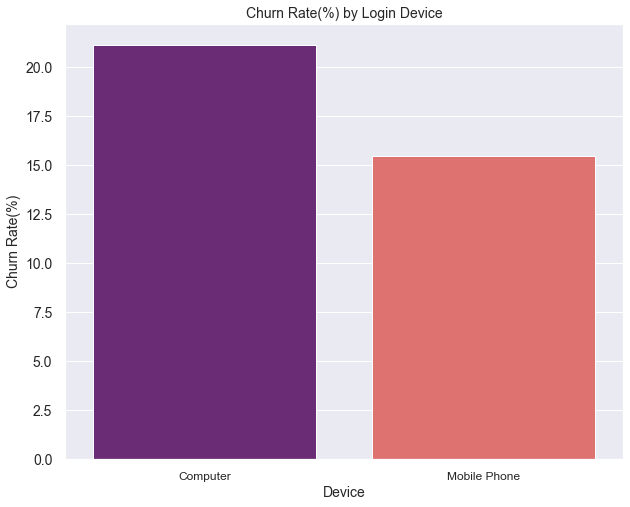

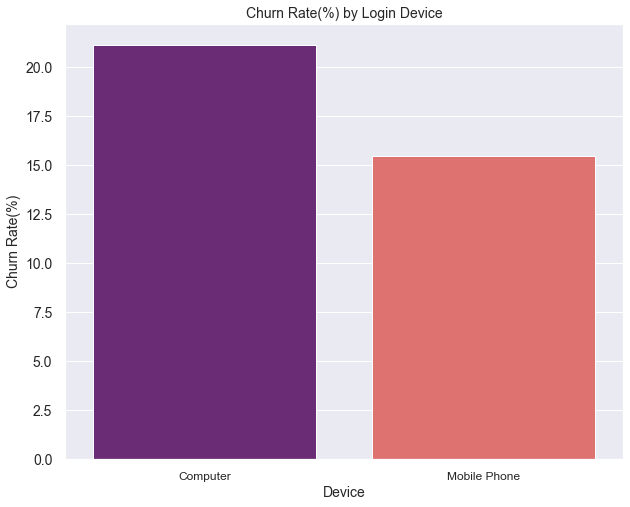

In [217]:
churn_device = 100*(X_train.groupby(["PreferredLoginDevice"])["Churn"].sum()/X_train.groupby(["PreferredLoginDevice"])["Churn"].count())
churn_device = churn_device.reset_index()

# visualisasi
plt.figure(figsize=(10,8))
sns.barplot(data=churn_device,x="PreferredLoginDevice",y="Churn",palette="magma")
plt.title("Churn Rate(%) by Login Device",fontsize=14)
plt.xlabel("Device",fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Churn Rate(%)",fontsize=14)
plt.yticks(fontsize=14)
plt.show()

berdasarkan dari penggunaan device, para customer yang menunggukan computer memiliki persentase 20% sedangkan customer yang menggunakan mobile phone memiliki tingkat persentase churn berkisar 15%

In [218]:
#ujii chi square
device_chi_test = pd.crosstab(X_train.PreferredLoginDevice,X_train.Churn)

#uji hipothesis
Ho = "Device Login not have correlation with churn"
H1= "Device Login have correlation with churn"

c, p, dof, expected = chi2_contingency(device_chi_test)

if p<0.05:
    print(H1,"as p value than 0.05, p value is {}".format(p))
else:
    print(Ho,"as p value more than 0.05, p value is {}".format(p))

Device Login have correlation with churn as p value than 0.05, p value is 3.433175017169198e-05
Device Login have correlation with churn as p value than 0.05, p value is 3.433175017169198e-05


dari hasil uji correlasi menggunakan chi square, didapatkan kesimpulan bahwa perbedaan device login memiliki pengaruh terhadap churn

  PreferredLoginDevice  Gender     Churn
0             Computer  Female  0.216667
1             Computer    Male  0.207951
2         Mobile Phone  Female  0.132475
3         Mobile Phone    Male  0.169385
  PreferredLoginDevice  Gender     Churn
0             Computer  Female  0.216667
1             Computer    Male  0.207951
2         Mobile Phone  Female  0.132475
3         Mobile Phone    Male  0.169385


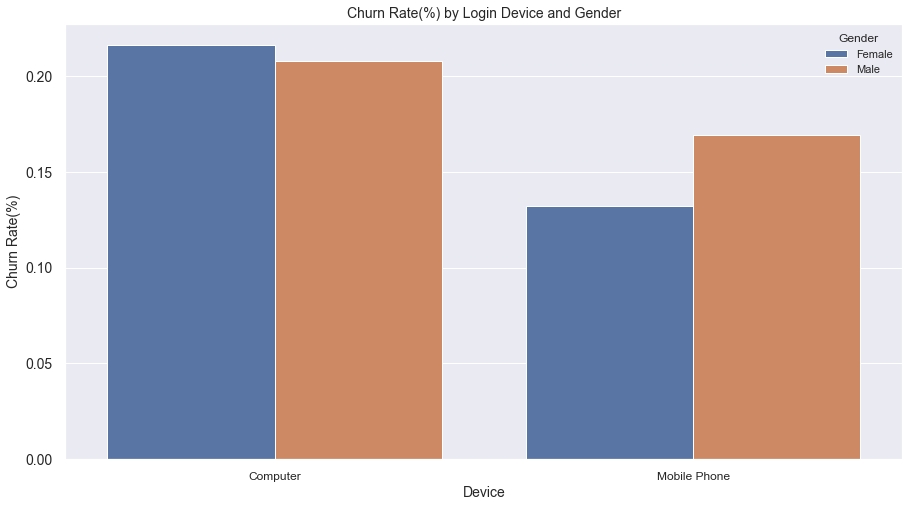

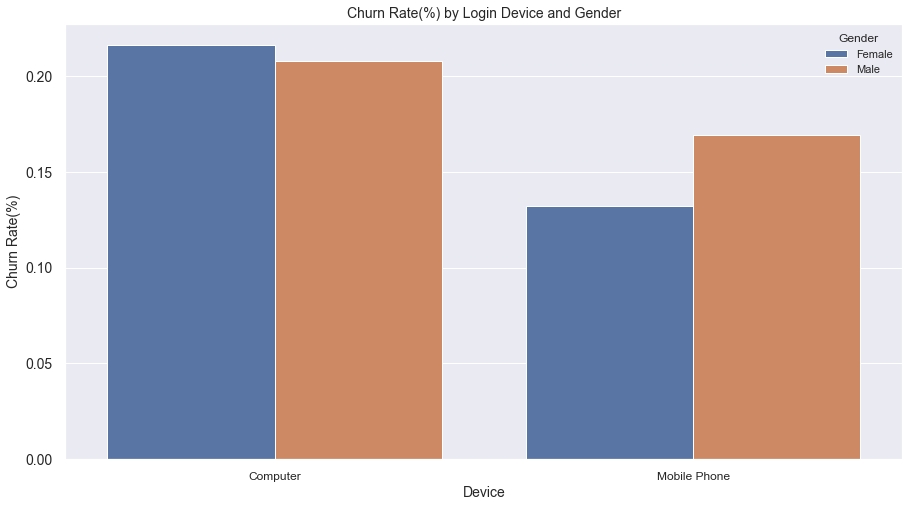

In [219]:
device_gender = X_train.groupby(["PreferredLoginDevice","Gender"],as_index=False)["Churn"].mean()

#visualisasi
print(X_train.groupby(["PreferredLoginDevice","Gender"],as_index=False)["Churn"].mean())
plt.figure(figsize=(15,8))
sns.barplot(data=device_gender,hue="Gender",y="Churn",x="PreferredLoginDevice")
plt.title("Churn Rate(%) by Login Device and Gender",fontsize=14)
plt.xlabel("Device",fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Churn Rate(%)",fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Jika di analisa lebih lanjut, kebanyakan customer yang churn menggunakan computer adalah wanita dengan persentase churn berkisar 21% dan customer yang churn menunggakan device mobile adalah pria dengan persentase churn sebesar 17% dari total churn

### Churn Rate Berdasarkan Payment mode

  PreferredPaymentMode  Churn
1                  COD  25.53
3             E wallet  23.93
4                  UPI  17.99
2           Debit Card  15.65
0                   CC  13.87
  PreferredPaymentMode  Churn
1                  COD  25.53
3             E wallet  23.93
4                  UPI  17.99
2           Debit Card  15.65
0                   CC  13.87


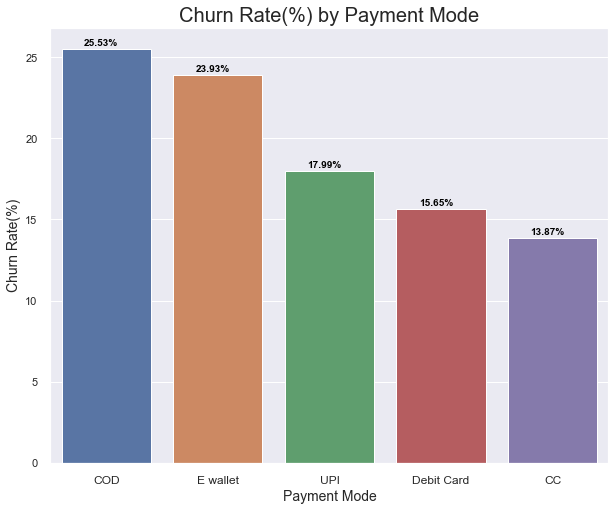

<Figure size 720x576 with 0 Axes>

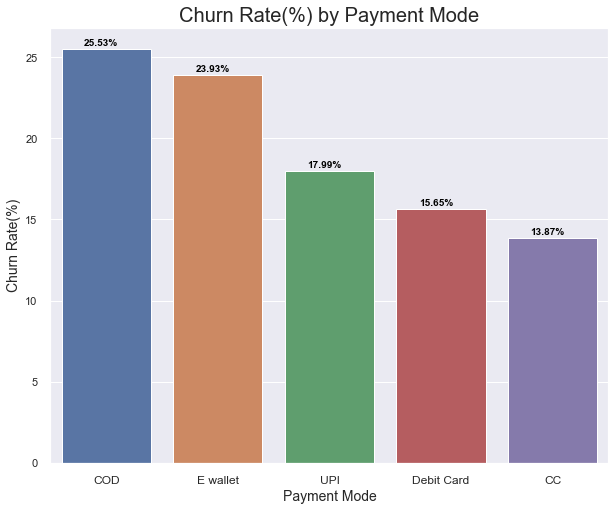

<Figure size 720x576 with 0 Axes>

In [220]:
payment_churn = X_train.groupby("PreferredPaymentMode",as_index=False)["Churn"].mean().sort_values("Churn",ascending=False)
payment_churn['Churn'] = round(payment_churn['Churn'] * 100, 2)

fig, ax = plt.subplots(ncols=1, figsize=(10, 8))
x = np.arange(len(payment_churn['Churn']))
y = payment_churn['Churn']
for i, v in enumerate(y):
    ax.text(x[i]-0.2, v+0.2, str(v)+'%', fontsize = 10, color='black', fontweight='bold')

#visualisasi
print(payment_churn)
plt.figure(figsize=(10,8))
s = sns.barplot(data=payment_churn,y="Churn",x="PreferredPaymentMode", ax=ax)
# ax.set_title("Churn Rate(%) by Payment Mode",fontsize=14)
# plt.xlabel("Payment Mode",fontsize=14)

ax.set_title("Churn Rate(%) by Payment Mode", fontsize=20)
ax.set_ylabel("Churn Rate(%)",fontsize=14)
ax.set_xlabel("Payment Mode",fontsize=14)
s.set_xticklabels(s.get_xticklabels(), fontsize=12)
plt.show()

Berdasarkan dari metode pembayaran, COD adalah metode pembayaran dengan tingkat churn yang tinggi berkisar 25% dari total churn disusul dengan metode pembayaran E-wallet berkisar 24% dan yang terendah adalah payment mode CC berkisar 14.5%

  PreferredPaymentMode  Gender      Churn
0                   CC  Female   9.484536
2                  COD  Female  19.512195
4           Debit Card  Female  17.092652
6             E wallet  Female  26.744186
8                  UPI  Female  11.881188
1                   CC    Male  16.956522
3                  COD    Male  29.126214
5           Debit Card    Male  14.660832
7             E wallet    Male  22.000000
9                  UPI    Male  21.276596
  PreferredPaymentMode  Gender      Churn
0                   CC  Female   9.484536
2                  COD  Female  19.512195
4           Debit Card  Female  17.092652
6             E wallet  Female  26.744186
8                  UPI  Female  11.881188
1                   CC    Male  16.956522
3                  COD    Male  29.126214
5           Debit Card    Male  14.660832
7             E wallet    Male  22.000000
9                  UPI    Male  21.276596


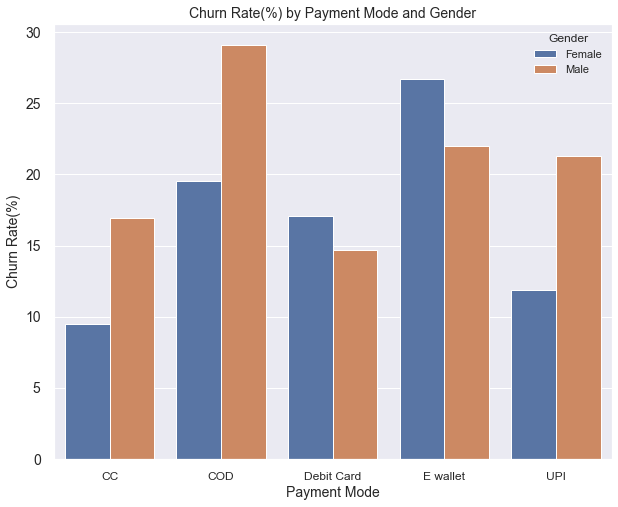

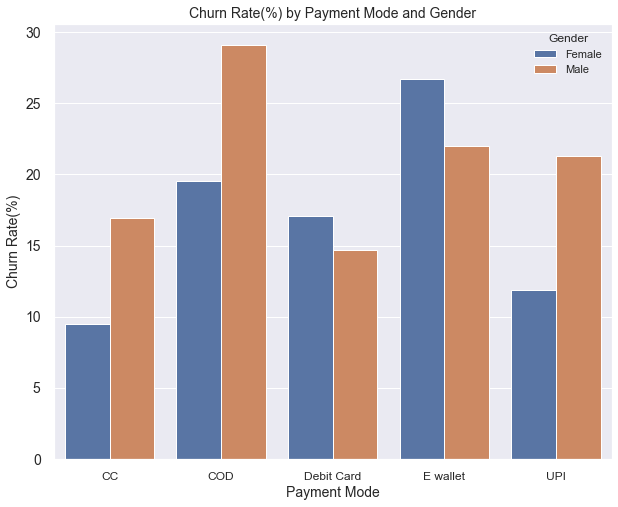

In [221]:
# Hubungan gender dan payment
payment_gender = X_train.groupby(["PreferredPaymentMode","Gender"],as_index=False)["Churn"].mean().sort_values("Gender")
payment_gender["Churn"] = payment_gender["Churn"]*100

#visualisasi
print(payment_gender)
plt.figure(figsize=(10,8))
sns.barplot(data=payment_gender,y="Churn",hue="Gender",x="PreferredPaymentMode")
plt.title("Churn Rate(%) by Payment Mode and Gender",fontsize=14)
plt.xlabel("Payment Mode",fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Churn Rate(%)",fontsize=14)
plt.yticks(fontsize=14)
plt.show()

dari segi pembayaran male memiliki permasalah pada pembayaran CC,COD dan UPI terlihat dari perbandingan persentase churnnya lebih tinggi di bandingkan female sebesar 17%,28%,23% berturut turut

   PreferredPaymentMode MaritalStatus      Churn
0                    CC      Divorced  11.176471
1                    CC       Married  12.383901
2                    CC        Single  17.827298
3                   COD      Divorced  13.636364
4                   COD       Married  15.476190
5                   COD        Single  44.444444
6            Debit Card      Divorced  16.309013
7            Debit Card       Married   9.469697
8            Debit Card        Single  24.854369
9              E wallet      Divorced  12.857143
10             E wallet       Married  15.859031
11             E wallet        Single  44.800000
12                  UPI      Divorced  10.256410
13                  UPI       Married  16.111111
14                  UPI        Single  27.142857
   PreferredPaymentMode MaritalStatus      Churn
0                    CC      Divorced  11.176471
1                    CC       Married  12.383901
2                    CC        Single  17.827298
3                   

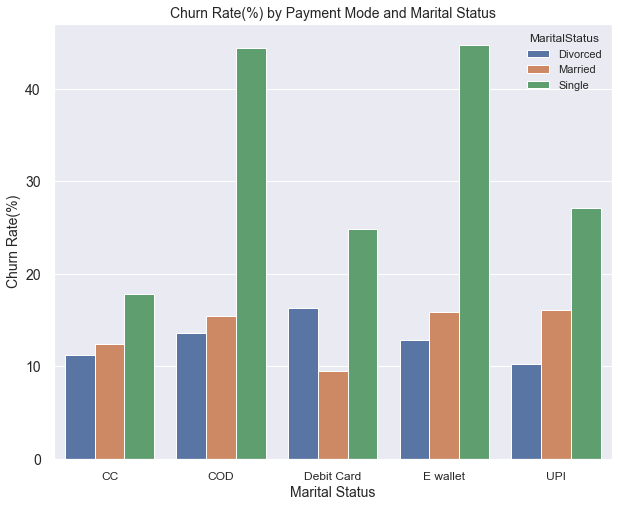

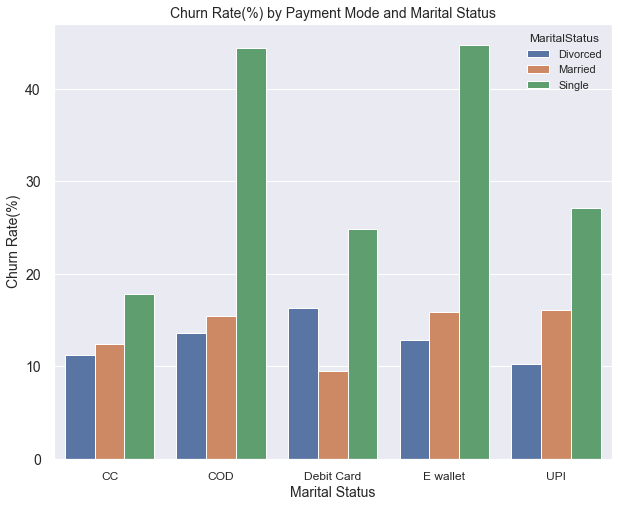

In [222]:
#hubungan marital status dan payment
payment_marital = X_train.groupby(["PreferredPaymentMode","MaritalStatus"],as_index=False)["Churn"].mean()
payment_marital["Churn"] = payment_marital["Churn"]*100

#visualisasi
print(payment_marital)
plt.figure(figsize=(10,8))
sns.barplot(data=payment_marital,y="Churn",hue="MaritalStatus",x="PreferredPaymentMode")
plt.title("Churn Rate(%) by Payment Mode and Marital Status",fontsize=14)
plt.xlabel("Marital Status",fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Churn Rate(%)",fontsize=14)
plt.yticks(fontsize=14)
plt.show()

dari segi pembayaran, single memiliki tingkat churn yang tinggi

### Churn Rate Berdasarkan Barang Yang Dibeli

     PreferedOrderCat      Churn
3        Mobile Phone  26.851211
0             Fashion  16.820702
2  Laptop & Accessory  10.647482
4              Others   4.285714
1             Grocery   3.347280
     PreferedOrderCat      Churn
3        Mobile Phone  26.851211
0             Fashion  16.820702
2  Laptop & Accessory  10.647482
4              Others   4.285714
1             Grocery   3.347280


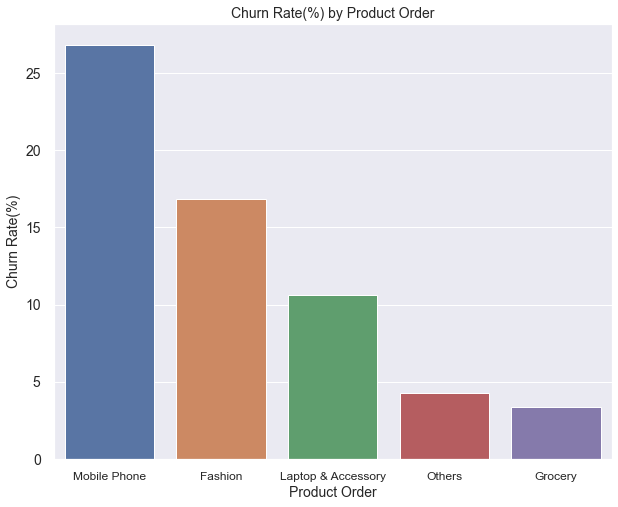

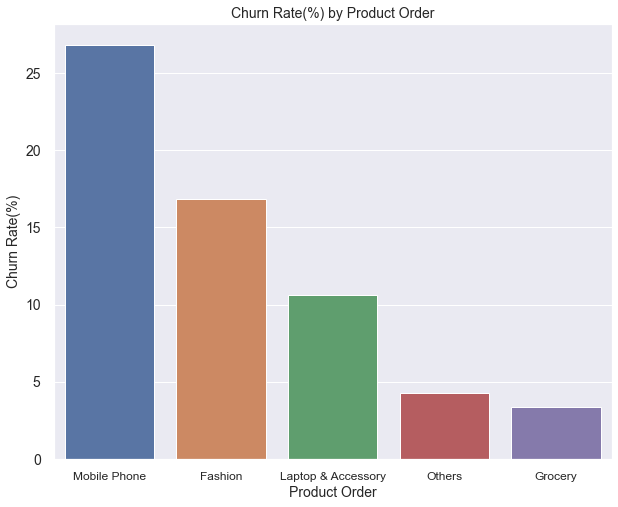

In [223]:
churn_product = X_train.groupby('PreferedOrderCat',as_index=False)["Churn"].mean().sort_values('Churn',ascending=False)
churn_product["Churn"] = churn_product["Churn"]*100

    
#visualisasi
print(churn_product)
plt.figure(figsize=(10,8))
sns.barplot(data=churn_product,y="Churn",x="PreferedOrderCat")
plt.title("Churn Rate(%) by Product Order",fontsize=14)
plt.xlabel("Product Order",fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Churn Rate(%)",fontsize=14)
plt.yticks(fontsize=14)
plt.show()

berdasarkan dari product yang diorder 27% dari total churn disebabkan oleh pembelian mobile phone, dan product yang diorder memiliki tingkat churn yang rendah adalah Grocery dengan tingkat churn berkisar 4% dari total churn

     PreferedOrderCat  Complain
3        Mobile Phone       405
2  Laptop & Accessory       389
0             Fashion       165
1             Grocery        71
4              Others        35
     PreferedOrderCat  Complain
3        Mobile Phone       405
2  Laptop & Accessory       389
0             Fashion       165
1             Grocery        71
4              Others        35


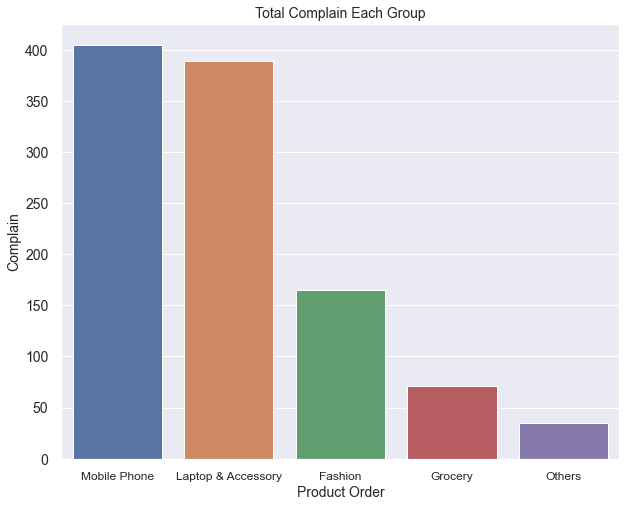

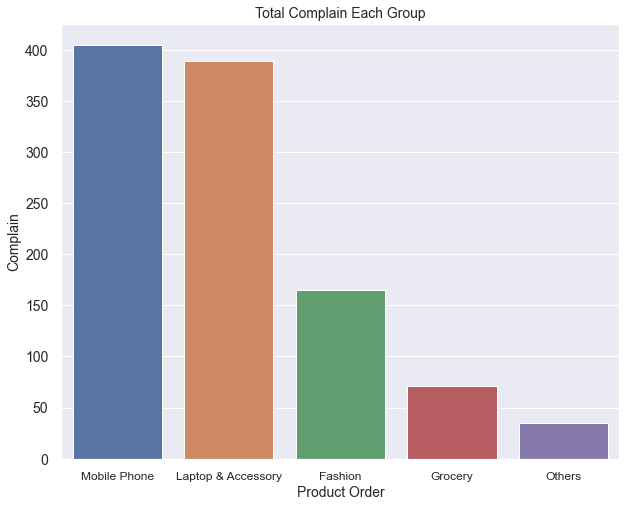

In [224]:
product_complain = X_train.groupby(["PreferedOrderCat"],as_index=False)["Complain"].sum().sort_values("Complain",ascending=False)

#visualisasi
print(product_complain)
plt.figure(figsize=(10,8))
sns.barplot(data=product_complain,y="Complain",x="PreferedOrderCat")
plt.title("Total Complain Each Group",fontsize=14)
plt.xlabel("Product Order",fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Complain",fontsize=14)
plt.yticks(fontsize=14)
plt.show()

     PreferedOrderCat  avg_cashback_per_order
4              Others              156.597739
1             Grocery              122.767494
0             Fashion              108.063593
2  Laptop & Accessory               96.364485
3        Mobile Phone               87.514748
     PreferedOrderCat  avg_cashback_per_order
4              Others              156.597739
1             Grocery              122.767494
0             Fashion              108.063593
2  Laptop & Accessory               96.364485
3        Mobile Phone               87.514748


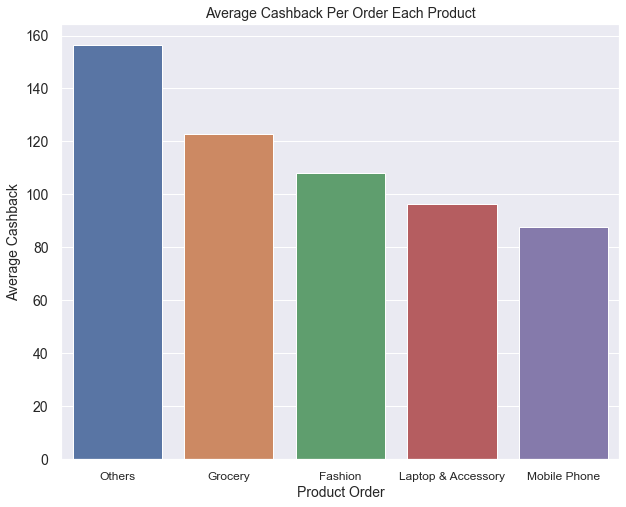

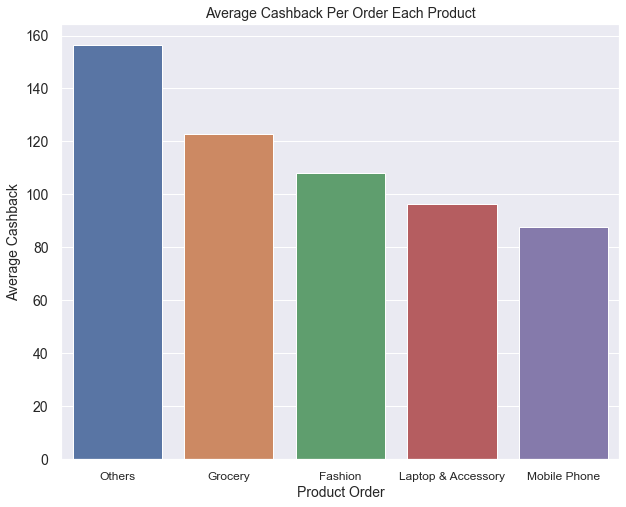

In [225]:
avgcashback_product = X_train.groupby('PreferedOrderCat',as_index=False)["avg_cashback_per_order"].mean().sort_values('avg_cashback_per_order',ascending=False)
#visualisasi
print(avgcashback_product )
plt.figure(figsize=(10,8))
sns.barplot(data=avgcashback_product,y="avg_cashback_per_order",x="PreferedOrderCat")
plt.title("Average Cashback Per Order Each Product",fontsize=14)
plt.xlabel("Product Order",fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Average Cashback",fontsize=14)
plt.yticks(fontsize=14)
plt.show()

jika dihubungkan dengan rata rata cashback per order dan total complain, mobile phone memberikan rata rata chasback yang kecil dan juga memiliki total complain yang banyak sehigga hal ini memungkinan terjadinya churn karena customer mendapatkan tempat pembelian mobile phone yang lebih murah dan memberikan tawaran cashback yang lebih baik yang juga product yang didapatkan sesuai keinginan

In [226]:
num = ['Tenure','CityTier','WarehouseToHome',
      'HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore',
     'NumberOfAddress','Complain','OrderAmountHikeFromlastYear',
      'CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount',
      'avg_cashback_per_order']
#melihat hubungan numerik dengan varabel target
X_train.groupby("Churn")[num].agg("mean")

Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
Churn                                                         
0      11.054271  1.620103        15.303147        2.912653   
1       3.602184  1.870515        17.046802        2.970359   

       NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
Churn                                                                           
0                      3.613680           2.977842         4.118497  0.232498   
1                      3.970359           3.414977         4.482059  0.531981   

       OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  \
Churn                                                                           
0                        15.633590    1.525048    2.581246           4.500963   
1                        15.583463    1.542902    2.505460           3.051482   

       CashbackAmount  avg_cashback_per_order  
Churn                                          
0          177.539409              100.199338  
1          158.406412               90.658697

Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
Churn                                                         
0      11.054271  1.620103        15.303147        2.912653   
1       3.602184  1.870515        17.046802        2.970359   

       NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
Churn                                                                           
0                      3.613680           2.977842         4.118497  0.232498   
1                      3.970359           3.414977         4.482059  0.531981   

       OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  \
Churn                                                                           
0                        15.633590    1.525048    2.581246           4.500963   
1                        15.583463    1.542902    2.505460           3.051482   

       CashbackAmount  avg_cashback_per_order  
Churn                                          
0          177.539409              100.199338  
1          158.406412               90.658697

### Churn By Distance

<AxesSubplot:xlabel='WarehouseToHome'>

<AxesSubplot:xlabel='WarehouseToHome'>

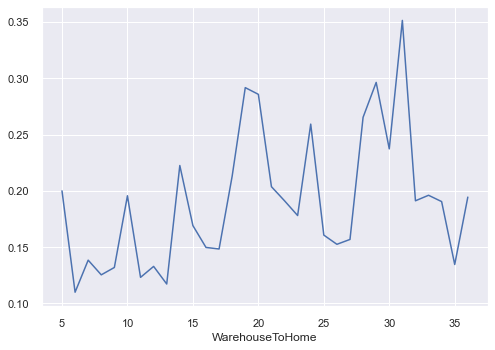

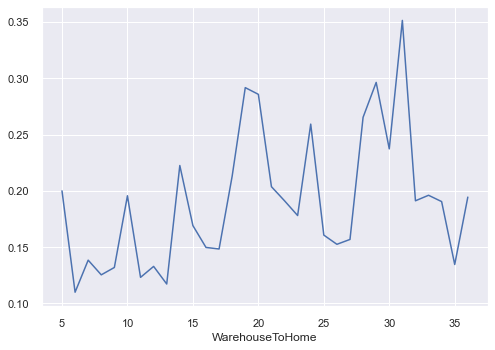

In [227]:
X_train.groupby("WarehouseToHome")["Churn"].mean().plot()

def bining(x):
    if x <10:
        return "5-9"
    elif x<=14:
        return "10-14"
    elif x<=20:
        return "15-20"
    else:
        return ">20"

In [228]:
def bining(x):
    if x <10:
        return "<10"
    elif x>=10 and x<=20:
        return "10-20"
    else:
        return ">20"

In [229]:
X_train["distance"] = X_train["WarehouseToHome"].apply(bining)

X_train["distance"].value_counts()

10-20    1754
<10      1101
>20       900
Name: distance, dtype: int64

10-20    1754
<10      1101
>20       900
Name: distance, dtype: int64

  distance      Churn
1      <10  12.806540
0    10-20  17.616876
2      >20  21.222222
  distance      Churn
1      <10  12.806540
0    10-20  17.616876
2      >20  21.222222


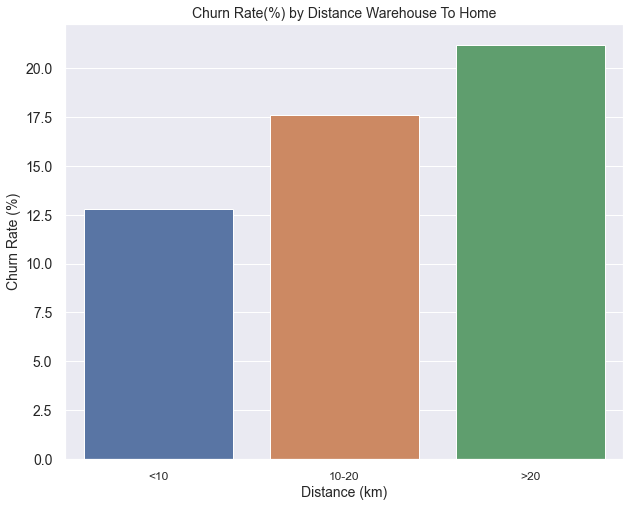

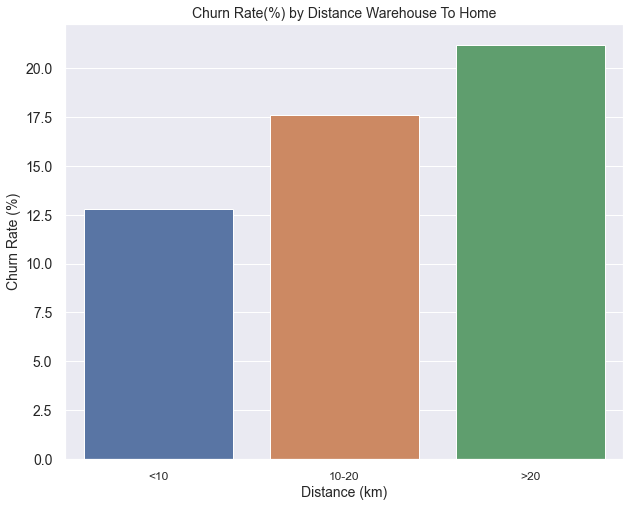

In [230]:
distance_churn = X_train.groupby("distance",as_index=False)["Churn"].mean().sort_values("Churn")
distance_churn["Churn"] = distance_churn["Churn"] * 100
#visualisasi
print(distance_churn)
plt.figure(figsize=(10,8))
sns.barplot(data=distance_churn,y="Churn",x="distance")
plt.title("Churn Rate(%) by Distance Warehouse To Home",fontsize=14)
plt.xlabel("Distance (km)",fontsize=14)
plt.xticks(fontsize=12)
plt.ylabel("Churn Rate (%)",fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Berdasarkan jarak antara warehouse dengan rumah costumer, semakin jauh jarak warehouse dengan rumah customer, churn cenderung meningkat, hal kemungkinan karena waktu pemesanan produk ke rumah customer memiliki waktu yang lebih lama dibandingkan dengan waktu kedatangan produk pesanan yang jarak rumahnya dekat dengan warehouse

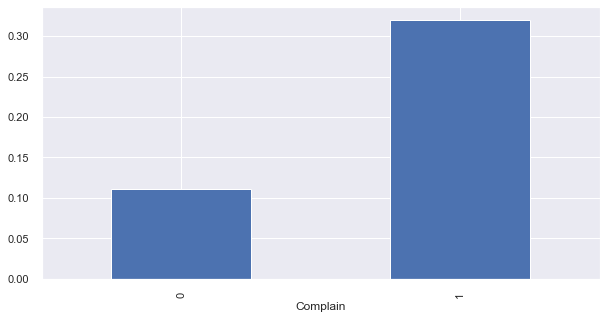

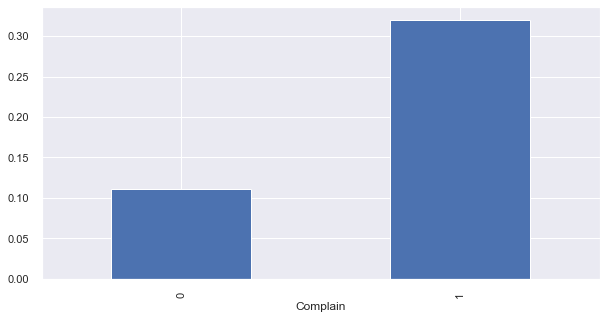

In [231]:
plt.figure(figsize=(10, 5))
X_train.groupby("Complain")["Churn"].mean().plot(kind="bar")
plt.show()


<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

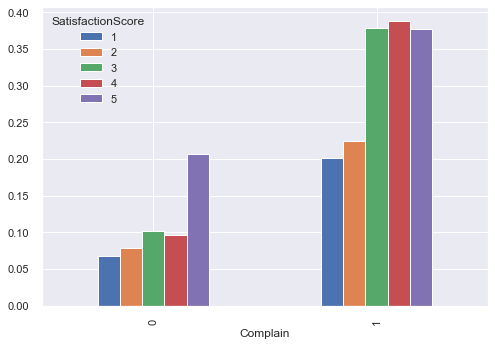

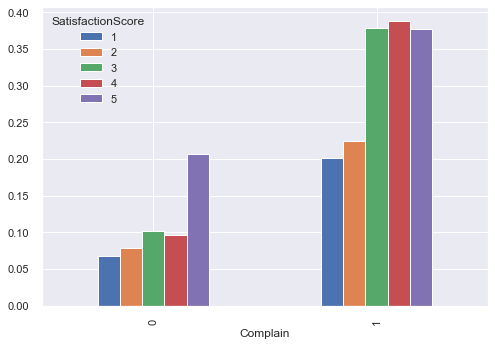

In [232]:
plt.figure(figsize=(10, 5))
X_train.groupby(["Complain","SatisfactionScore"])["Churn"].mean().unstack().plot(kind="bar")
plt.show()

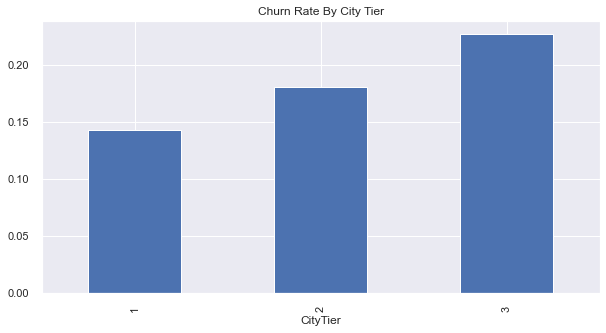

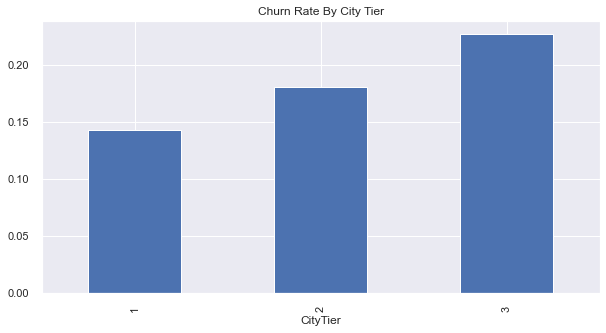

In [233]:
plt.figure(figsize=(10, 5))
X_train.groupby(["CityTier"])["Churn"].mean().plot(kind="bar")
plt.title("Churn Rate By City Tier")
plt.show()

Text(0.5, 1.0, 'Churn Rate By City Tier and Complain')

Text(0.5, 1.0, 'Churn Rate By City Tier and Complain')

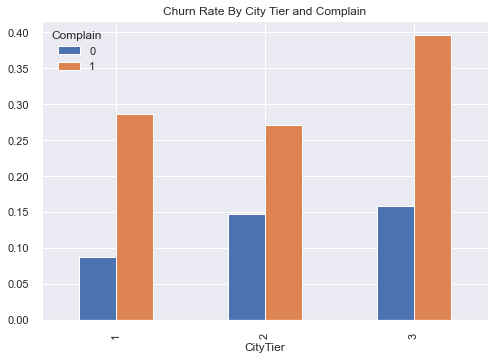

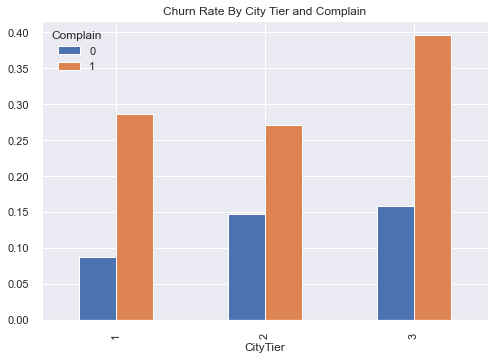

In [234]:
pd.pivot_table(X_train,index="CityTier",columns="Complain",values="Churn",aggfunc='mean').plot(kind="bar")
plt.title("Churn Rate By City Tier and Complain")

dari grafik diatas kita mengetahui bahwa :<br>
1.Churn rate pada citytier 3 sangat tinggi sebesar ~25% <br>
2.ketika citytier melakukan complain, churn rate meningkat hingga 40%

## Corellation Numeric with Target

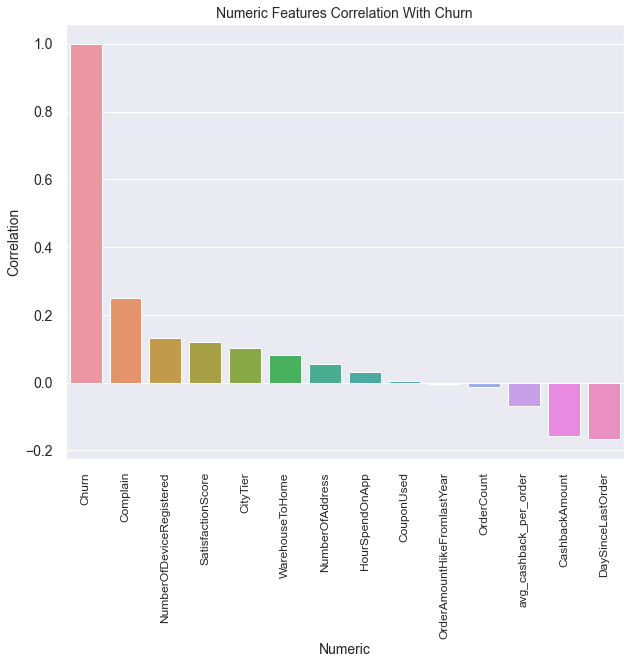

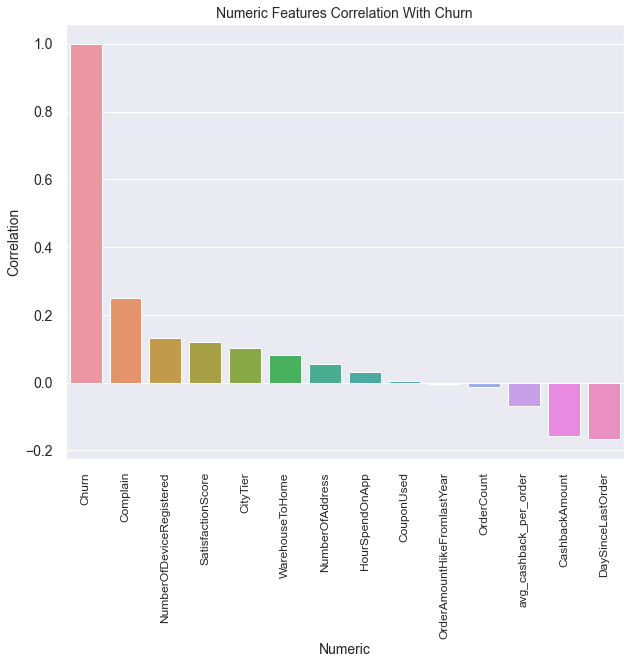

In [235]:
num_cor = X_train.select_dtypes('number').columns

num_cor = X_train[num_cor].corr()["Churn"].iloc[2::].reset_index().sort_values("Churn",ascending=False)

#visualisasi
plt.figure(figsize=(10,8))
sns.barplot(data=num_cor,y="Churn",x="index")
plt.title("Numeric Features Correlation With Churn",fontsize=14)
plt.xlabel("Numeric",fontsize=14)
plt.xticks(fontsize=12,rotation=90)
plt.ylabel("Correlation",fontsize=14)
plt.yticks(fontsize=14)
plt.show()

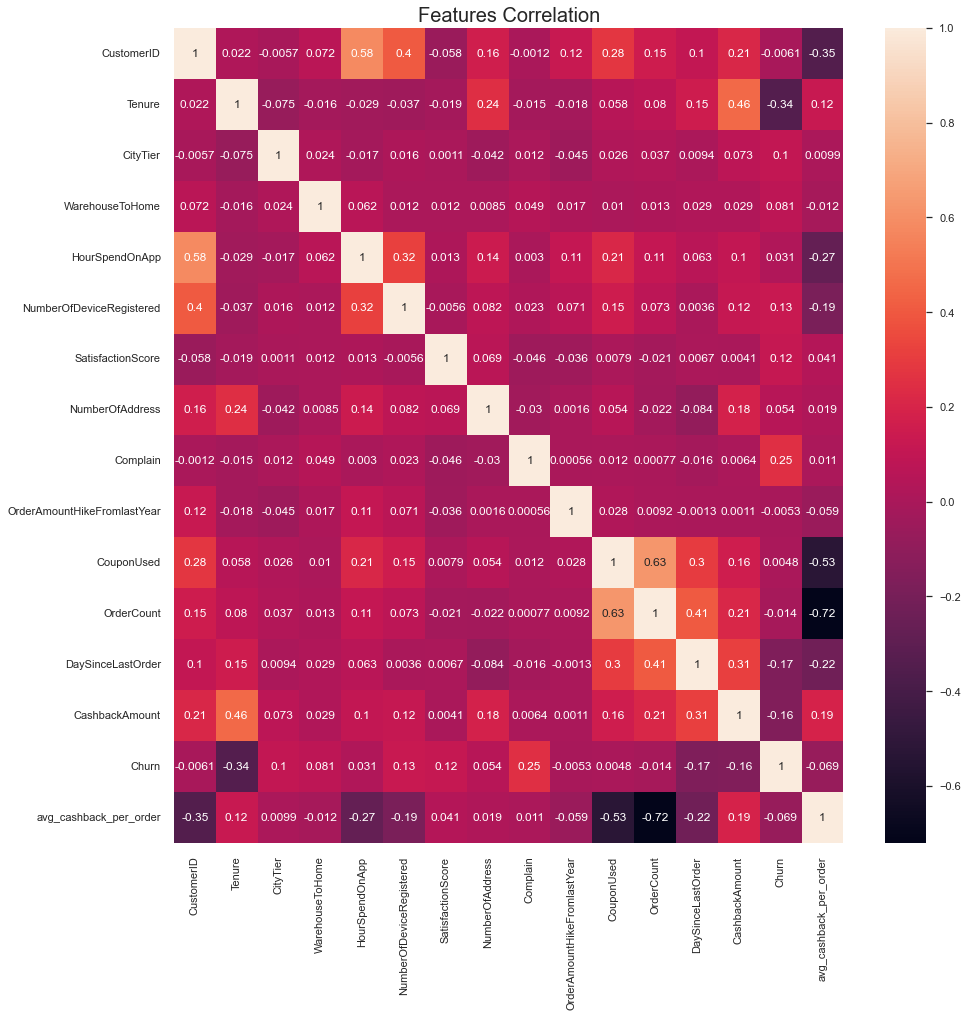

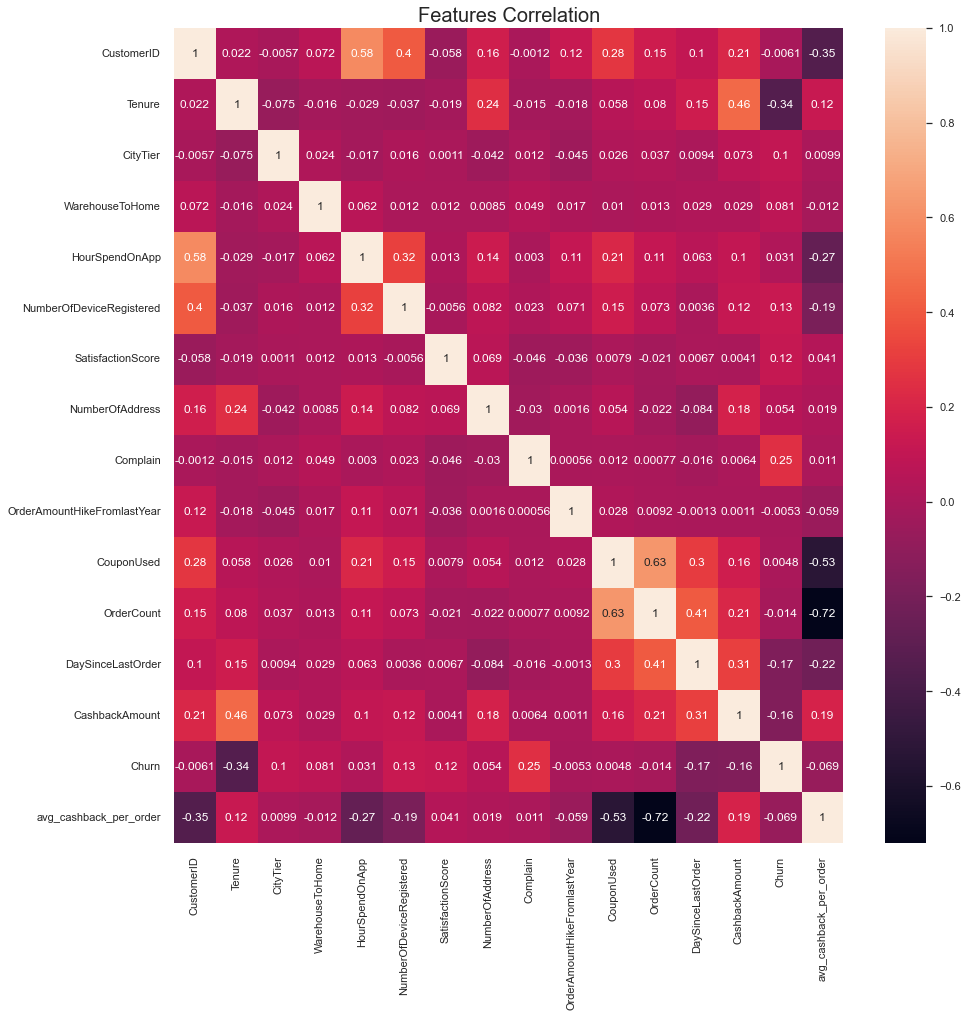

In [236]:
plt.figure(figsize=(15,15))
sns.heatmap(X_train.corr(),annot=True,fmt=".2g")
plt.title("Features Correlation",fontsize=20)
plt.show()

### Corrrelation Categorical With Target

In [237]:
device_dummies = pd.get_dummies(X_train["PreferredLoginDevice"],prefix="Divice")
payment_dummies = pd.get_dummies(X_train["PreferredPaymentMode"],prefix="Payment")
gender_dummies = pd.get_dummies(X_train["Gender"],prefix="Gender")
order_dummies = pd.get_dummies(X_train["PreferedOrderCat"],prefix="Order")
marital_dummies = pd.get_dummies(X_train["MaritalStatus"],prefix="Status")
distance_dummies = pd.get_dummies(X_train["distance"],prefix="Distance")

#gabungkang kolom dummies dengan kolom churn
churn_cat = pd.concat([device_dummies,payment_dummies,gender_dummies,gender_dummies,
                       order_dummies,marital_dummies,distance_dummies,X_train["Churn"]],axis=1)

churn_cat

Divice_Computer  Divice_Mobile Phone  Payment_CC  Payment_COD  \
1186                1                    0           1            0   
3145                0                    1           1            0   
608                 0                    1           1            0   
5202                1                    0           0            0   
4133                0                    1           0            0   
...               ...                  ...         ...          ...   
1916                1                    0           0            0   
5038                1                    0           1            0   
1384                1                    0           0            0   
4026                0                    1           0            1   
2761                0                    1           0            0   

      Payment_Debit Card  Payment_E wallet  Payment_UPI  Gender_Female  \
1186                   0                 0            0              1   
3145                   0                 0            0              1   
608                    0                 0            0              0   
5202                   1                 0            0              0   
4133                   1                 0            0              0   
...                  ...               ...          ...            ...   
1916                   1                 0            0              1   
5038                   0                 0            0              0   
1384                   1                 0            0              1   
4026                   0                 0            0              0   
2761                   1                 0            0              0   

      Gender_Male  Gender_Female  Gender_Male  Order_Fashion  Order_Grocery  \
1186            0              1            0              0              0   
3145            0              1            0              0              1   
608             1              0            1              0              0   
5202            1              0            1              0              0   
4133            1              0            1              0              0   
...           ...            ...          ...            ...            ...   
1916            0              1            0              0              0   
5038            1              0            1              0              0   
1384            0              1            0              0              0   
4026            1              0            1              0              0   
2761            1              0            1              0              0   

      Order_Laptop & Accessory  Order_Mobile Phone  Order_Others  \
1186                         0                   1             0   
3145                         0                   0             0   
608                          1                   0             0   
5202                         0                   1             0   
4133                         0                   0             1   
...                        ...                 ...           ...   
1916                         0                   1             0   
5038                         1                   0             0   
1384                         1                   0             0   
4026                         0                   1             0   
2761                         1                   0             0   

      Status_Divorced  Status_Married  Status_Single  Distance_10-20  \
1186                0               0              1               1   
3145                0               1              0               0   
608                 1               0              0               0   
5202                0               0              1               1   
4133                0               1              0               0   
...               ...             ...            ...             .

Divice_Computer  Divice_Mobile Phone  Payment_CC  Payment_COD  \
1186                1                    0           1            0   
3145                0                    1           1            0   
608                 0                    1           1            0   
5202                1                    0           0            0   
4133                0                    1           0            0   
...               ...                  ...         ...          ...   
1916                1                    0           0            0   
5038                1                    0           1            0   
1384                1                    0           0            0   
4026                0                    1           0            1   
2761                0                    1           0            0   

      Payment_Debit Card  Payment_E wallet  Payment_UPI  Gender_Female  \
1186                   0                 0            0              1   
3145                   0                 0            0              1   
608                    0                 0            0              0   
5202                   1                 0            0              0   
4133                   1                 0            0              0   
...                  ...               ...          ...            ...   
1916                   1                 0            0              1   
5038                   0                 0            0              0   
1384                   1                 0            0              1   
4026                   0                 0            0              0   
2761                   1                 0            0              0   

      Gender_Male  Gender_Female  Gender_Male  Order_Fashion  Order_Grocery  \
1186            0              1            0              0              0   
3145            0              1            0              0              1   
608             1              0            1              0              0   
5202            1              0            1              0              0   
4133            1              0            1              0              0   
...           ...            ...          ...            ...            ...   
1916            0              1            0              0              0   
5038            1              0            1              0              0   
1384            0              1            0              0              0   
4026            1              0            1              0              0   
2761            1              0            1              0              0   

      Order_Laptop & Accessory  Order_Mobile Phone  Order_Others  \
1186                         0                   1             0   
3145                         0                   0             0   
608                          1                   0             0   
5202                         0                   1             0   
4133                         0                   0             1   
...                        ...                 ...           ...   
1916                         0                   1             0   
5038                         1                   0             0   
1384                         1                   0             0   
4026                         0                   1             0   
2761                         1                   0             0   

      Status_Divorced  Status_Married  Status_Single  Distance_10-20  \
1186                0               0              1               1   
3145                0               1              0               0   
608                 1               0              0               0   
5202                0               0              1               1   
4133                0               1              0               0   
...               ...             ...            ...             .

In [238]:
churn_cat = pd.DataFrame(churn_cat.corr()["Churn"]).reset_index().rename(columns=({
    "index":"categorical",
    "Churn":"correlation"})).sort_values("correlation",ascending=False)

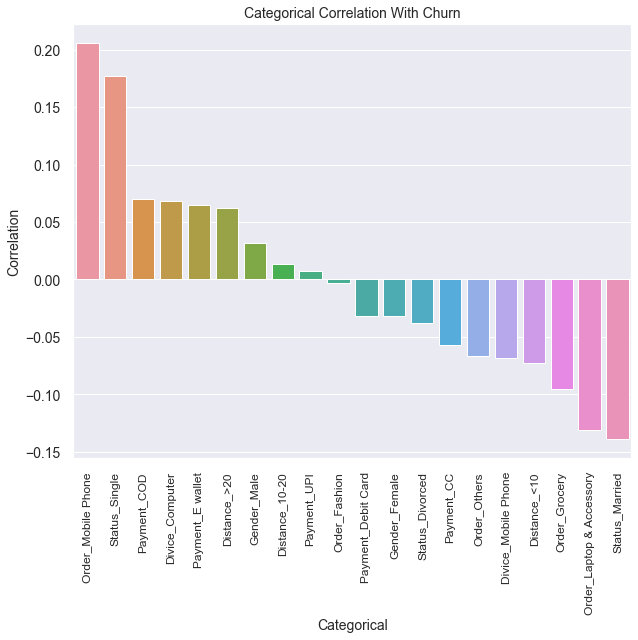

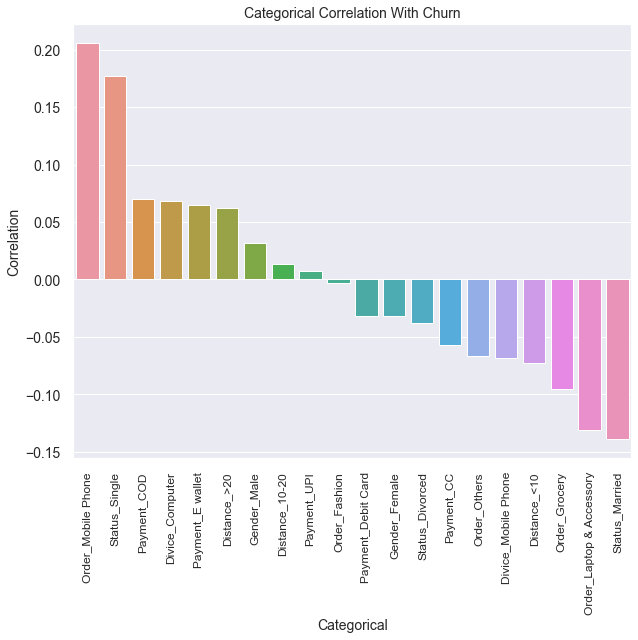

In [239]:
churn_cat = churn_cat[1:]
plt.figure(figsize=(10,8))
sns.barplot(data=churn_cat,y="correlation",x="categorical")
plt.title("Categorical Correlation With Churn",fontsize=14)
plt.xlabel("Categorical",fontsize=14)
plt.xticks(fontsize=12,rotation=90)
plt.ylabel("Correlation",fontsize=14)
plt.yticks(fontsize=14)
plt.show()

tidak terdapat multicolinearity pada fitur to fitur. untuk fitur yang korelasi rendah terhadap target akan dibuang

# Feature Engineering

In [240]:
# set index CustomerID
X_train = X_train.set_index('CustomerID')

## Feature Encoding
Karena tidak semua model machine learning dapat menangani data kategorikal, maka kita akan rubah data kategorikal menjadi numerik.
Pada step ini akan dilakukan dua metode encoding, yaitu OrdialEncoding dan Ohe-Hot Encoding
- Ordinal Encoding dilakukan pada feature dengan kategori ordinal
- One-Hot Encoding dilakukan pada feature dengan kategori nominal 

In [241]:
# Ordinal Encoding using category_encoder
encoder = ce.OrdinalEncoder(cols='distance', return_df=True,
                           mapping=[{'col':'distance', 
                           'mapping':{
                               None:0, 
                               '<10':1, # <10 to 1
                               '10-20':2, # 10-20 to 2 
                               '>20':3}}]) # >20 to 3

X_train = encoder.fit_transform(X_train)

In [242]:
X_train = pd.get_dummies(X_train,columns=["PreferredPaymentMode","PreferedOrderCat","MaritalStatus","PreferredLoginDevice"],drop_first=True)
X_train = X_train.drop(["Gender","Tenure_Categoric"],axis=1)

# Preprocessing Data Test

In [243]:
# missing values imputation
num_columns = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear','CouponUsed', 'OrderCount', 'DaySinceLastOrder']

for column in num_columns:
    X_test.loc[X_test[column].isnull(), column] = X_train[column].median()


# Convert data type to integer 
X_test['HourSpendOnApp'] = X_test['HourSpendOnApp'].astype(int)
X_test['Tenure'] = X_test['Tenure'].astype(int)
X_test['OrderAmountHikeFromlastYear'] = X_test['OrderAmountHikeFromlastYear'].astype(int)
X_test['CouponUsed'] = X_test['CouponUsed'].astype(int)
X_test['OrderCount'] = X_test['OrderCount'].astype(int)
X_test['DaySinceLastOrder'] = X_test['DaySinceLastOrder'].astype(int)
X_test["WarehouseToHome"] = X_test["WarehouseToHome"].astype(int)

# Merubah PreferredPaymentMode dri CreditCard jadi CC
X_test['PreferredPaymentMode'] = X_test['PreferredPaymentMode'].replace({'Credit Card':'CC'})

# Merubah PreferredPaymentMode dri Cash On Delivery jadi COD
X_test['PreferredPaymentMode'] = X_test['PreferredPaymentMode'].replace({'Cash on Delivery':'COD'})

# Merubah PreferedOrderCat Device dri Phone jadi Mobile Phone
X_test['PreferedOrderCat'] = X_test['PreferedOrderCat'].replace({'Mobile':'Mobile Phone'})

# Merubah Login Device dri Phone jadi Mobile Phone
X_test['PreferredLoginDevice'] = X_test['PreferredLoginDevice'].replace({'Phone':'Mobile Phone'})

#check data set dengan melihat 5 baris pertama
X_test.head()

CustomerID  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
174        50175      24         Mobile Phone         1                8   
5498       55499       1         Mobile Phone         3               16   
4705       54706       4         Mobile Phone         3               34   
1154       51155       7             Computer         1               14   
4850       54851       5         Mobile Phone         1               19   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
174                    CC    Male               2                         5   
5498                   CC    Male               3                         4   
4705             E wallet    Male               4                         4   
1154                   CC    Male               2                         3   
4850                   CC  Female               3                         4   

        PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
174   Laptop & Accessory                  4       Married                6   
5498        Mobile Phone                  1        Single                3   
4705  Laptop & Accessory                  1       Married                9   
1154        Mobile Phone                  4       Married                2   
4850  Laptop & Accessory                  1       Married                2   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
174          0                           18           0           1   
5498         0                           14           1           2   
4705         0                           24           3           8   
1154         1                           12           1           2   
4850         1                           12           7           9   

      DaySinceLastOrder  CashbackAmount  
174                   2          154.82  
5498                  1          135.81  
4705                  8          178.04  
1154                  3          123.42  
4850                  6          183.55

CustomerID  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
174        50175      24         Mobile Phone         1                8   
5498       55499       1         Mobile Phone         3               16   
4705       54706       4         Mobile Phone         3               34   
1154       51155       7             Computer         1               14   
4850       54851       5         Mobile Phone         1               19   

     PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
174                    CC    Male               2                         5   
5498                   CC    Male               3                         4   
4705             E wallet    Male               4                         4   
1154                   CC    Male               2                         3   
4850                   CC  Female               3                         4   

        PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
174   Laptop & Accessory                  4       Married                6   
5498        Mobile Phone                  1        Single                3   
4705  Laptop & Accessory                  1       Married                9   
1154        Mobile Phone                  4       Married                2   
4850  Laptop & Accessory                  1       Married                2   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
174          0                           18           0           1   
5498         0                           14           1           2   
4705         0                           24           3           8   
1154         1                           12           1           2   
4850         1                           12           7           9   

      DaySinceLastOrder  CashbackAmount  
174                   2          154.82  
5498                  1          135.81  
4705                  8          178.04  
1154                  3          123.42  
4850                  6          183.55

In [244]:
X_test = X_test.set_index("CustomerID")
X_test['avg_cashback_per_order'] = X_test['CashbackAmount']/X_test['OrderCount']
X_test["distance"] = X_test["WarehouseToHome"].apply(bining)
X_test = encoder.fit_transform(X_test)
X_test = pd.get_dummies(X_test,columns=["PreferredPaymentMode","PreferedOrderCat","MaritalStatus","PreferredLoginDevice"],drop_first=True)
X_test = X_test.drop(["Gender","WarehouseToHome"],axis=1)
X_train = X_train.drop(["WarehouseToHome"],axis=1)

In [245]:
X_test.head()

Tenure  CityTier  HourSpendOnApp  NumberOfDeviceRegistered  \
CustomerID                                                               
50175           24         1               2                         5   
55499            1         3               3                         4   
54706            4         3               4                         4   
51155            7         1               2                         3   
54851            5         1               3                         4   

            SatisfactionScore  NumberOfAddress  Complain  \
CustomerID                                                 
50175                       4                6         0   
55499                       1                3         0   
54706                       1                9         0   
51155                       4                2         1   
54851                       1                2         1   

            OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
CustomerID                                                        
50175                                18           0           1   
55499                                14           1           2   
54706                                24           3           8   
51155                                12           1           2   
54851                                12           7           9   

            DaySinceLastOrder  CashbackAmount  avg_cashback_per_order  \
CustomerID                                                              
50175                       2          154.82              154.820000   
55499                       1          135.81               67.905000   
54706                       8          178.04               22.255000   
51155                       3          123.42               61.710000   
54851                       6          183.55               20.394444   

            distance  PreferredPaymentMode_COD  \
CustomerID                                       
50175              1                         0   
55499              2                         0   
54706              3                         0   
51155              2                         0   
54851              2                         0   

            PreferredPaymentMode_Debit Card  PreferredPaymentMode_E wallet  \
CustomerID                                                                   
50175                                     0                              0   
55499                                     0                              0   
54706                                     0                              1   
51155                                     0                              0   
54851                                     0                              0   

            PreferredPaymentMode_UPI  PreferedOrderCat_Grocery  \
CustomerID                                                       
50175                              0                         0   
55499                              0                         0   
54706                              0                         0   
51155                              0                         0   
54851                              0                         0   

            PreferedOrderCat_Laptop & Accessory  \
CustomerID                                        
50175                                         1   
55499                                         0   
54706                                         1   
51155                                         0   
54851                                         1   

            PreferedOrderCat_Mobile Phone  PreferedOrderCat_Others  \
CustomerID                                                           
50175                                   0                        0   
55499                                   1                        0   
54706                                   0                        0   
51155                

Tenure  CityTier  HourSpendOnApp  NumberOfDeviceRegistered  \
CustomerID                                                               
50175           24         1               2                         5   
55499            1         3               3                         4   
54706            4         3               4                         4   
51155            7         1               2                         3   
54851            5         1               3                         4   

            SatisfactionScore  NumberOfAddress  Complain  \
CustomerID                                                 
50175                       4                6         0   
55499                       1                3         0   
54706                       1                9         0   
51155                       4                2         1   
54851                       1                2         1   

            OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
CustomerID                                                        
50175                                18           0           1   
55499                                14           1           2   
54706                                24           3           8   
51155                                12           1           2   
54851                                12           7           9   

            DaySinceLastOrder  CashbackAmount  avg_cashback_per_order  \
CustomerID                                                              
50175                       2          154.82              154.820000   
55499                       1          135.81               67.905000   
54706                       8          178.04               22.255000   
51155                       3          123.42               61.710000   
54851                       6          183.55               20.394444   

            distance  PreferredPaymentMode_COD  \
CustomerID                                       
50175              1                         0   
55499              2                         0   
54706              3                         0   
51155              2                         0   
54851              2                         0   

            PreferredPaymentMode_Debit Card  PreferredPaymentMode_E wallet  \
CustomerID                                                                   
50175                                     0                              0   
55499                                     0                              0   
54706                                     0                              1   
51155                                     0                              0   
54851                                     0                              0   

            PreferredPaymentMode_UPI  PreferedOrderCat_Grocery  \
CustomerID                                                       
50175                              0                         0   
55499                              0                         0   
54706                              0                         0   
51155                              0                         0   
54851                              0                         0   

            PreferedOrderCat_Laptop & Accessory  \
CustomerID                                        
50175                                         1   
55499                                         0   
54706                                         1   
51155                                         0   
54851                                         1   

            PreferedOrderCat_Mobile Phone  PreferedOrderCat_Others  \
CustomerID                                                           
50175                                   0                        0   
55499                                   1                        0   
54706                                   0                        0   
51155                

In [246]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1689 entries, 50175 to 52478
Data columns (total 25 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Tenure                               1689 non-null   int32  
 1   CityTier                             1689 non-null   int64  
 2   HourSpendOnApp                       1689 non-null   int32  
 3   NumberOfDeviceRegistered             1689 non-null   int64  
 4   SatisfactionScore                    1689 non-null   int64  
 5   NumberOfAddress                      1689 non-null   int64  
 6   Complain                             1689 non-null   int64  
 7   OrderAmountHikeFromlastYear          1689 non-null   int32  
 8   CouponUsed                           1689 non-null   int32  
 9   OrderCount                           1689 non-null   int32  
 10  DaySinceLastOrder                    1689 non-null   int32  
 11  CashbackAmount           

In [247]:
# Distribution of training target
y_train = X_train["Churn"].copy()
X_train = X_train.drop('Churn',axis=1)

In [248]:
# oversampling
# X_train_over, y_train_over = SMOTE(frac=0.5).fit_resample(X_train, y_train)

# # distribution target after oversampling
# pd.Series(y_train_over).value_counts()

# Modeling

Pada tahap modelling kita akan membandingkan beberapa metode yang nantinya kita akan pilih mana model yang menghasilkan performa terbaik. Model dengan performa terbaik yang nantinya akan kita pilih dalam tahap selanjutnya.

## Choose the Best Classifier

In [249]:
# Model assignment
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
abc = AdaBoostClassifier(random_state=42)
etc = ExtraTreesClassifier(random_state=42) 
gbc = GradientBoostingClassifier(random_state=42)
bgc = BaggingClassifier(random_state=42)
knn = KNeighborsClassifier() 
logreg = LogisticRegression(random_state=42)
nb = GaussianNB()
svm = SVC(random_state=42)
xgb = XGBClassifier(eval_metric='mlogloss',random_state=42)
mlp = MLPClassifier(random_state=42)

# Assign model to a list
models = [dtc, rfc, abc, etc, gbc, bgc, knn, logreg, nb, svm, xgb, mlp]

model_name = []

# Get Classifier names for every model
for name in models:
    names = str(type(name)).split('.')[-1][:-2]
    # Append classifier names to model_name list
    model_name.append(names)

### Cross Validation
Pada tahap ini kita lakukan training pada seluruh data menggunakan cross validation.

In [250]:
# Cross validation for each model 
dtc_score = cross_val_score(models[0], X_train, y_train, scoring='f1', cv=5, n_jobs=-1, verbose=1)
rfc_score = cross_val_score(models[1], X_train, y_train, scoring='f1', cv=5, n_jobs=-1, verbose=1)
abc_score = cross_val_score(models[2], X_train, y_train, scoring='f1', cv=5, n_jobs=-1, verbose=1)
etc_score = cross_val_score(models[3], X_train, y_train, scoring='f1', cv=5, n_jobs=-1, verbose=1)
gbc_score = cross_val_score(models[4], X_train, y_train, scoring='f1', cv=5, n_jobs=-1, verbose=1)
bgc_score = cross_val_score(models[5], X_train, y_train, scoring='f1', cv=5, n_jobs=-1, verbose=1)
knn_score = cross_val_score(models[6], X_train, y_train, scoring='f1', cv=5, n_jobs=-1, verbose=1)
logreg_score = cross_val_score(models[7], X_train, y_train, scoring='f1', cv=5, n_jobs=-1, verbose=1)
nb_score = cross_val_score(models[8], X_train, y_train, scoring='f1', cv=5, n_jobs=-1, verbose=1)
svm_score = cross_val_score(models[9], X_train, y_train, scoring='f1', cv=5, n_jobs=-1, verbose=1)
xgb_score = cross_val_score(models[10], X_train, y_train, scoring='f1', cv=5, n_jobs=-1, verbose=1)
mlp_score = cross_val_score(models[11], X_train, y_train, scoring='f1', cv=5, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.4s finished
[Parallel(n_

In [251]:
# List of score per model
cv_result = [
    dtc_score, rfc_score, abc_score, etc_score, gbc_score, bgc_score, 
    knn_score, logreg_score, nb_score, svm_score, xgb_score, mlp_score]

# Create dataframe for score every k-fold
df_cv_result = pd.DataFrame(cv_result, index=model_name)
df_cv_result

0         1         2         3         4
DecisionTreeClassifier      0.773946  0.790698  0.836364  0.781609  0.734375
RandomForestClassifier      0.831933  0.853333  0.880000  0.836207  0.767857
AdaBoostClassifier          0.658333  0.682028  0.710744  0.621277  0.552995
ExtraTreesClassifier        0.846154  0.853333  0.851240  0.831858  0.766520
GradientBoostingClassifier  0.691983  0.769231  0.726496  0.687500  0.593301
BaggingClassifier           0.747899  0.808889  0.846774  0.778243  0.770563
KNeighborsClassifier        0.484305  0.464646  0.533333  0.413793  0.421569
LogisticRegression          0.637168  0.637681  0.640693  0.574163  0.546296
GaussianNB                  0.484108  0.511057  0.497512  0.472222  0.483627
SVC                         0.000000  0.000000  0.000000  0.000000  0.000000
XGBClassifier               0.841270  0.897119  0.887160  0.830645  0.794979
MLPClassifier               0.604651  0.701107  0.657244  0.599119  0.422222

0         1         2         3         4
DecisionTreeClassifier      0.773946  0.790698  0.836364  0.781609  0.734375
RandomForestClassifier      0.831933  0.853333  0.880000  0.836207  0.767857
AdaBoostClassifier          0.658333  0.682028  0.710744  0.621277  0.552995
ExtraTreesClassifier        0.846154  0.853333  0.851240  0.831858  0.766520
GradientBoostingClassifier  0.691983  0.769231  0.726496  0.687500  0.593301
BaggingClassifier           0.747899  0.808889  0.846774  0.778243  0.770563
KNeighborsClassifier        0.484305  0.464646  0.533333  0.413793  0.421569
LogisticRegression          0.637168  0.637681  0.640693  0.574163  0.546296
GaussianNB                  0.484108  0.511057  0.497512  0.472222  0.483627
SVC                         0.000000  0.000000  0.000000  0.000000  0.000000
XGBClassifier               0.841270  0.897119  0.887160  0.830645  0.794979
MLPClassifier               0.604651  0.701107  0.657244  0.599119  0.422222

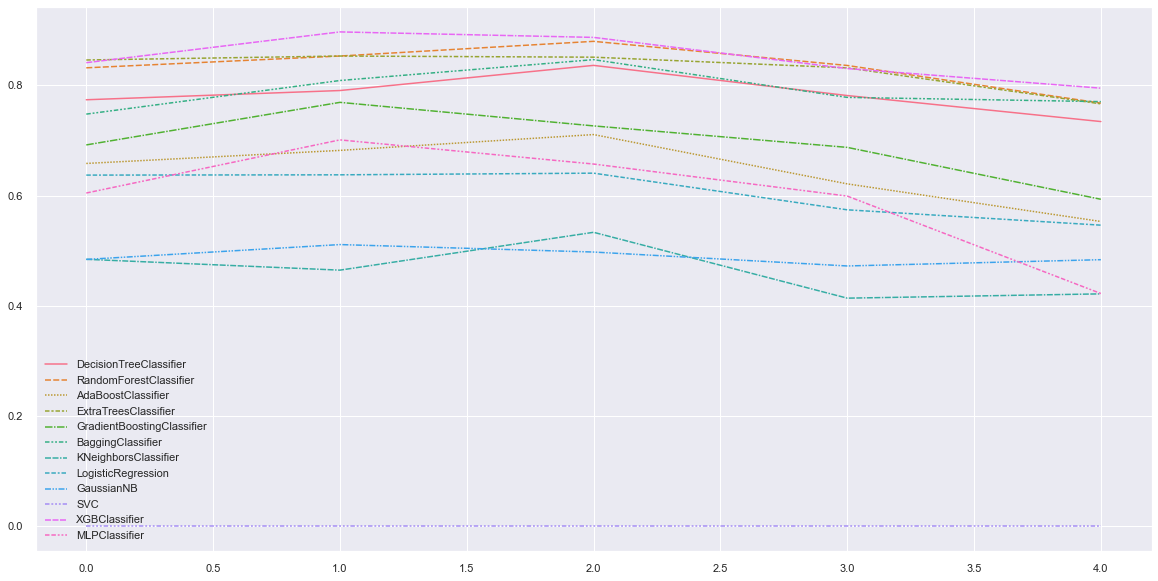

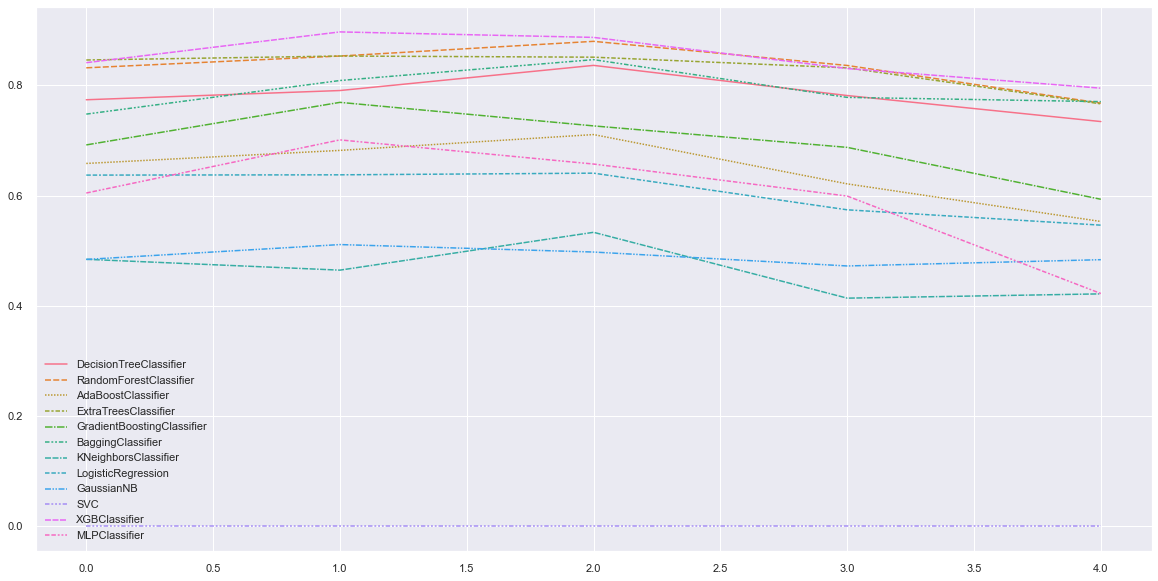

In [252]:
# Plot cross validation score
sns.set_style('darkgrid')
plt.figure(figsize=(20,10))
sns.lineplot(data=df_cv_result.T)
plt.show()

model XGBOost memiliki statbility yang sangat baik dari hasil cross validation

In [253]:
# Calculate average for every k-fold validation
cv_mean = []
i = 0
for mean in cv_result:
    mean = cv_result[i].mean()
    cv_mean.append(mean)
    i += 1

In [254]:
# Calculate standard deviation for every k-fold validation
cv_std = []
i = 0 
for std in cv_result:
    std = cv_result[i].std()
    cv_std.append(std)
    i += 1

In [255]:
# Average and standard deviation score for each model
df_cv = pd.DataFrame({'score_mean':cv_mean, 'score_std':cv_std}, index=model_name).sort_values(['score_mean', 'score_std'], ascending=[False, True])
df_cv

score_mean  score_std
XGBClassifier                 0.850235   0.037627
RandomForestClassifier        0.833866   0.037078
ExtraTreesClassifier          0.829821   0.032526
BaggingClassifier             0.790474   0.034256
DecisionTreeClassifier        0.783398   0.032724
GradientBoostingClassifier    0.693702   0.058141
AdaBoostClassifier            0.645075   0.054587
LogisticRegression            0.607200   0.039369
MLPClassifier                 0.596869   0.094950
GaussianNB                    0.489705   0.013347
KNeighborsClassifier          0.463529   0.043680
SVC                           0.000000   0.000000

score_mean  score_std
XGBClassifier                 0.850235   0.037627
RandomForestClassifier        0.833866   0.037078
ExtraTreesClassifier          0.829821   0.032526
BaggingClassifier             0.790474   0.034256
DecisionTreeClassifier        0.783398   0.032724
GradientBoostingClassifier    0.693702   0.058141
AdaBoostClassifier            0.645075   0.054587
LogisticRegression            0.607200   0.039369
MLPClassifier                 0.596869   0.094950
GaussianNB                    0.489705   0.013347
KNeighborsClassifier          0.463529   0.043680
SVC                           0.000000   0.000000

Pada eksperimen diatas didapatkan nilai rata-rata f1 scsore dan standard deviasi nya dari setiap k-fold validation. XGBClassifier memiliki performa terbaik dengan rata-rata akurasi mencapai 85% dengan standard deviasi 0.037.

### Fit and Evaluation
Selain dengan menggunakan Cross Validation, saya juga melakukan uji nilai akurasi pada data training dan testing yang bertujuan untuk melihat akurasi saat data training dan testing dan perbedaaannya. Maka di dapatkan hasil sebagai berikut :

In [256]:
# Create a list to assign a model score
train_score = []
test_score = []

# Create dataframe
df_train_test = pd.DataFrame()
for i in models:
    # Fit each model
    model = i.fit(X_train, y_train)
    # accuracy for training set
    train_score.append(model.score(X_train, y_train))
    # accuracy for testing set
    test_score.append(model.score(X_test, y_test))

In [257]:
# Create a dataframe to store accuracy score
df_avg_score = pd.DataFrame({
    'train score':train_score,
    'test score':test_score},
    index=model_name)

# Create a new column for the difference in accuracy score 
df_avg_score['difference'] = abs(df_avg_score['train score'] - df_avg_score['test score'])
# Sort accuracy by smallest difference
df_avg_score = df_avg_score.sort_values(['train score', 'test score','difference'], ascending=[False, False, True])
df_avg_score

train score  test score  difference
XGBClassifier                  1.000000    0.972173    0.027827
ExtraTreesClassifier           1.000000    0.963292    0.036708
RandomForestClassifier         1.000000    0.962700    0.037300
DecisionTreeClassifier         1.000000    0.941978    0.058022
BaggingClassifier              0.997870    0.953819    0.044051
GradientBoostingClassifier     0.929694    0.910598    0.019096
AdaBoostClassifier             0.901465    0.886915    0.014549
KNeighborsClassifier           0.898269    0.851391    0.046878
MLPClassifier                  0.891877    0.891060    0.000818
LogisticRegression             0.886551    0.885139    0.001412
SVC                            0.829294    0.831853    0.002559
GaussianNB                     0.724368    0.721729    0.002639

train score  test score  difference
XGBClassifier                  1.000000    0.972173    0.027827
ExtraTreesClassifier           1.000000    0.963292    0.036708
RandomForestClassifier         1.000000    0.962700    0.037300
DecisionTreeClassifier         1.000000    0.941978    0.058022
BaggingClassifier              0.997870    0.953819    0.044051
GradientBoostingClassifier     0.929694    0.910598    0.019096
AdaBoostClassifier             0.901465    0.886915    0.014549
KNeighborsClassifier           0.898269    0.851391    0.046878
MLPClassifier                  0.891877    0.891060    0.000818
LogisticRegression             0.886551    0.885139    0.001412
SVC                            0.829294    0.831853    0.002559
GaussianNB                     0.724368    0.721729    0.002639

Terlihat bahwa XGBClassifier memiliki perbedaan nilai f1 score rata rata terkecil, hanya selisih sekitar 0.02%

### Cross Validation for Some Metrics
Kali ini kita akan lakukan cross validation untuk mengukur performa model dengan beberapa metrik, yaitu accuracy, precision, recall, dan f1-score.

In [258]:
# Cross validation for each model
dtc_score = cross_validate(models[0], X_train, y_train, scoring=('roc_auc', 'f1'), cv=5, n_jobs=-1, verbose=1)
rfc_score = cross_validate(models[1], X_train, y_train, scoring=('roc_auc', 'f1'), cv=5, n_jobs=-1, verbose=1)
abc_score = cross_validate(models[2], X_train, y_train, scoring=('roc_auc', 'f1'), cv=5, n_jobs=-1, verbose=1)
etc_score = cross_validate(models[3], X_train, y_train, scoring=('roc_auc', 'f1'), cv=5, n_jobs=-1, verbose=1)
gbc_score = cross_validate(models[4], X_train, y_train, scoring=('roc_auc', 'f1'), cv=5, n_jobs=-1, verbose=1)
bgc_score = cross_validate(models[5], X_train, y_train, scoring=('roc_auc', 'f1'), cv=5, n_jobs=-1, verbose=1)
knn_score = cross_validate(models[6], X_train, y_train, scoring=('roc_auc', 'f1'), cv=5, n_jobs=-1, verbose=1)
logreg_score = cross_validate(models[7], X_train, y_train, scoring=('roc_auc', 'f1'), cv=5, n_jobs=-1, verbose=1)
nb_score = cross_validate(models[8], X_train, y_train, scoring=('roc_auc', 'f1'), cv=5, n_jobs=-1, verbose=1)
svm_score = cross_validate(models[9], X_train, y_train, scoring=('roc_auc', 'f1'), cv=5, n_jobs=-1, verbose=1)
xgb_score = cross_validate(models[10], X_train, y_train, scoring=('roc_auc', 'f1'), cv=5, n_jobs=-1, verbose=1)
mlp_score = cross_validate(models[11], X_train, y_train, scoring=('roc_auc', 'f1'), cv=5, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    1.3s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    1.3s finished
[Parallel(n_

In [259]:
cv_result = [
    dtc_score, rfc_score, abc_score, etc_score, gbc_score, bgc_score, 
    knn_score, logreg_score, nb_score, svm_score, xgb_score, mlp_score]

# Average score for each metrics
df_cv_result = pd.DataFrame(cv_result, index=model_name).applymap(np.mean)
df_cv_result = df_cv_result.sort_values(['test_roc_auc', 'test_f1'], ascending=False)
df_cv_result = df_cv_result.reset_index()
df_cv_result.rename(columns={'index':'Model'}, inplace=True)
df_cv_result

Model  fit_time  score_time  test_roc_auc   test_f1
0         ExtraTreesClassifier  0.828600    0.164798      0.984311  0.829821
1       RandomForestClassifier  1.189582    0.143007      0.973270  0.833866
2                XGBClassifier  0.834590    0.025004      0.972226  0.850235
3            BaggingClassifier  0.242187    0.055821      0.956910  0.790474
4   GradientBoostingClassifier  1.146598    0.019189      0.934659  0.693702
5           AdaBoostClassifier  0.631005    0.266192      0.912879  0.645075
6                MLPClassifier  1.524682    0.011799      0.896041  0.596869
7                          SVC  0.386274    0.409595      0.885981  0.000000
8           LogisticRegression  0.090197    0.010802      0.884761  0.607200
9       DecisionTreeClassifier  0.049985    0.015197      0.875945  0.783398
10                  GaussianNB  0.006801    0.010998      0.830127  0.489705
11        KNeighborsClassifier  0.016000    0.228984      0.825083  0.463529

Model  fit_time  score_time  test_roc_auc   test_f1
0         ExtraTreesClassifier  0.828600    0.164798      0.984311  0.829821
1       RandomForestClassifier  1.189582    0.143007      0.973270  0.833866
2                XGBClassifier  0.834590    0.025004      0.972226  0.850235
3            BaggingClassifier  0.242187    0.055821      0.956910  0.790474
4   GradientBoostingClassifier  1.146598    0.019189      0.934659  0.693702
5           AdaBoostClassifier  0.631005    0.266192      0.912879  0.645075
6                MLPClassifier  1.524682    0.011799      0.896041  0.596869
7                          SVC  0.386274    0.409595      0.885981  0.000000
8           LogisticRegression  0.090197    0.010802      0.884761  0.607200
9       DecisionTreeClassifier  0.049985    0.015197      0.875945  0.783398
10                  GaussianNB  0.006801    0.010998      0.830127  0.489705
11        KNeighborsClassifier  0.016000    0.228984      0.825083  0.463529

Dari hasil diatas, XGBClassifier memiliki nilai roc auc terbaik ketika dan f1 score yang paling tinggi dari keseluruhan model. Pada kasus ini karena data yang imbalance maka f1 score yang menjadi acuan
> Dari keseluruhan proses diatas, maka saya akan memilih model **XGBClassifier** karena memiliki nilai f1 score terbaik

## XBGClassifier
Pada tahap ini kita akan melakukan perbandingan performa model sebelum dan sesudah dilakukan feature selection.

### Default Parameter

In [260]:
# Fit classifier
xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)

# predict test set
y_pred_def = xgb.predict(X_test)

# Calculate accuracy, precision, recall, and f1-score
train_score_def = round((xgb.score(X_train, y_train) * 100), 2)
test_score_def = round((xgb.score(X_test, y_test) * 100), 2)
prec_score_def = round((precision_score(y_test, y_pred_def)) * 100, 2)
recall_score_def = round((recall_score(y_test, y_pred_def)) * 100, 2)
f1_def = round(f1_score(y_test, y_pred_def)*100, 2)

print('Training Accuracy : {}%'.format(train_score_def))
print('Test Accuracy : {}%'.format(test_score_def))
print('Precision Score : {}%'.format(prec_score_def))
print('Recall Score : {}%'.format(recall_score_def))
print('F1 Score : {}%'.format(f1_def))

Training Accuracy : 100.0%
Test Accuracy : 97.22%
Precision Score : 94.72%
Recall Score : 88.38%
F1 Score : 91.44%
Training Accuracy : 100.0%
Test Accuracy : 97.22%
Precision Score : 94.72%
Recall Score : 88.38%
F1 Score : 91.44%


Setelah dilakukan feature selection, teryata didapatkan performa model yang lebih baik dari sebelum melakukan feature selection.

# Model Evaluation
Lakukan evaluasi terhadap model, seperti melihat confusion matrix, classification report dan feature importance hasil  training.

## Confusion Matrix

[[1391   14]
 [  33  251]]
[[1391   14]
 [  33  251]]


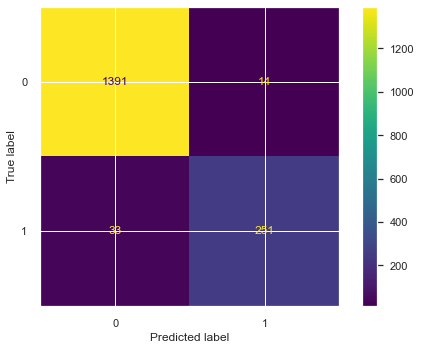

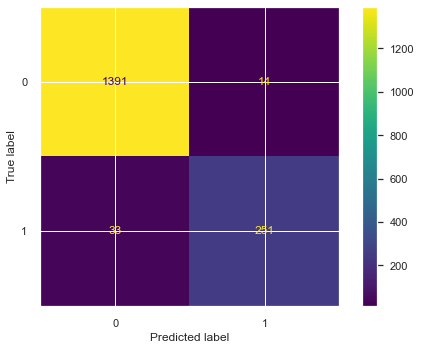

In [261]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_def)
print(cm)
ConfusionMatrixDisplay(cm).plot()
plt.show()

## Classification Report

In [262]:
# Classification report model
cr = classification_report(y_test, y_pred_def)
print(cr)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1405
           1       0.95      0.88      0.91       284

    accuracy                           0.97      1689
   macro avg       0.96      0.94      0.95      1689
weighted avg       0.97      0.97      0.97      1689

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1405
           1       0.95      0.88      0.91       284

    accuracy                           0.97      1689
   macro avg       0.96      0.94      0.95      1689
weighted avg       0.97      0.97      0.97      1689



## Precision Recall and ROC Curve

In [263]:
# Precision Recall Curve
y_pred = xgb.predict_proba(X_test)[:,1]
prec, recall, _ = precision_recall_curve(y_test, y_pred, pos_label=xgb.classes_[1])
pr_display = PrecisionRecallDisplay(prec, recall)

In [264]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred, pos_label=xgb.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

ROC AUC Score is : 0.9796827226705428
ROC AUC Score is : 0.9796827226705428


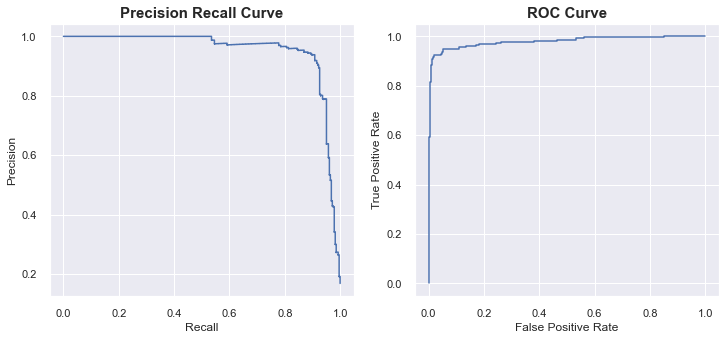

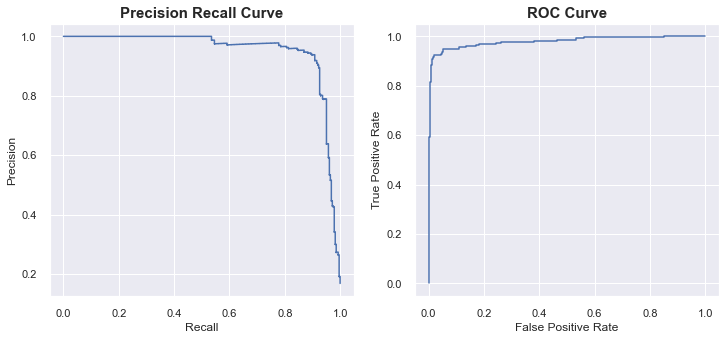

In [265]:
# roc auc score
auc_score = roc_auc_score(y_test, y_pred)
print(f'ROC AUC Score is : {auc_score}')

# Plotting Precision Recall and ROC Curve
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

pr_display.plot(ax=ax1)
roc_display.plot(ax=ax2)
ax1.set_title('Precision Recall Curve', fontsize=15, fontweight='bold')
ax2.set_title('ROC Curve', fontsize=15, fontweight='bold')
plt.show()

## Feature Importance

# Intrepretable

In [266]:
import dalex as dx

In [267]:
## initiate explainer for Random Forest model
xgb_explainer = dx.Explainer(xgb, X_train, y_train, label = "XGBoost Interpretation")

Preparation of a new explainer is initiated

  -> data              : 3755 rows 25 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 3755 values
  -> model_class       : xgboost.sklearn.XGBClassifier (default)
  -> label             : XGBoost Interpretation
  -> predict function  : <function yhat_proba_default at 0x000001E1B4F68F70> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 5.45e-06, mean = 0.171, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.223, mean = 7.15e-06, max = 0.345
  -> model_info        : package xgboost

A new explainer has been created!
Preparation of a new explainer is initiated

  -> data              : 3755 rows 25 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a num

In [268]:
xgb_explainer.model_profile().plot()

Calculating ceteris paribus: 100%|█████████████████████████████████████████████████████| 25/25 [00:01<00:00, 19.83it/s]



In [269]:
# visualize permutation feature importance for ridge regression
xgb_explainer.model_parts().plot()

1.Membuat Customer Betah Diatas 2 Bulan Memberikan Dampak Penurunan Churn Rate hingga 80% <br>
2.Complain Menjadi Masalah Serius Jika Tidak Segera Diatasi Karena Memberikan Dampak Probability Churn Hingga 67%

# Cummulative Gain Curve

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

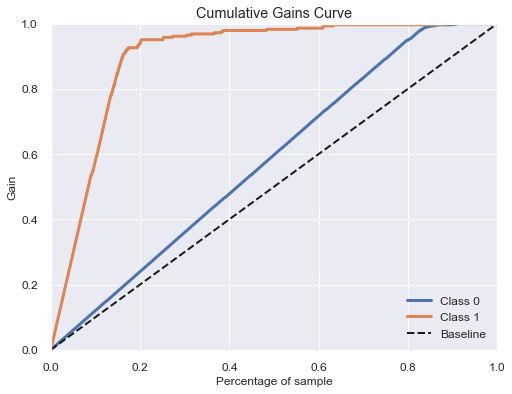

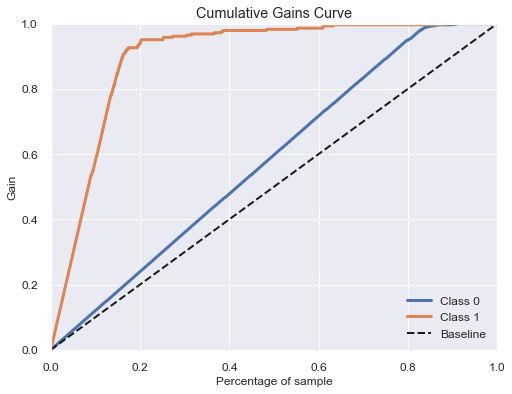

In [270]:
import scikitplot as skplt

skplt.metrics.plot_cumulative_gain(y_test,xgb.predict_proba(X_test), title='Cumulative Gains Curve', ax=None, figsize=(8,6), title_fontsize='large', text_fontsize='medium')

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

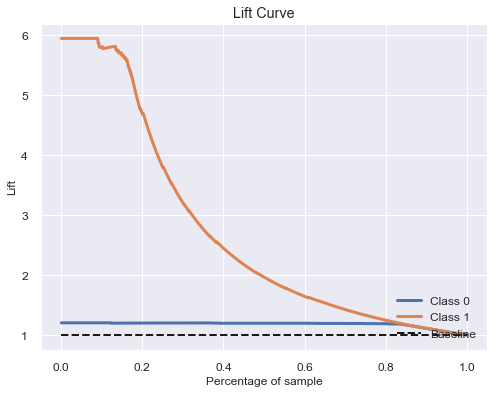

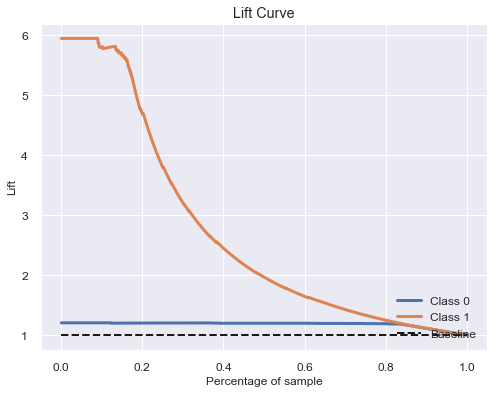

In [271]:
skplt.metrics.plot_lift_curve(y_test,xgb.predict_proba(X_test), title='Lift Curve', ax=None, figsize=(8,6), title_fontsize='large', text_fontsize='medium')

1.model xgboost mampu mengcapture 97% customer yang akan churn pada populasi <br>
2.Model memiliki performa 4.7 kali lipat dibandinkan dengan random choice

# Profit Curve

Jika kita memprediksi customer tidak churn, tetapi aktual customer churn maka perusahaan akan rugi sebanyak $150 dollar/customer. Tetapi jika kita mampu memprediksi customer yang churn dan aktual churn maka perusahaan akan mendapatkan net profit 175 dollar/orang

In [272]:
def standard_confusion_matrix(y_true, y_pred):
    
    [[tn, fp], [fn, tp]] = confusion_matrix(y_true, y_pred)
    return np.array([[tp, fp], [fn, tn]])

Text(0.5, 0, 'Population')

Text(0.5, 0, 'Population')

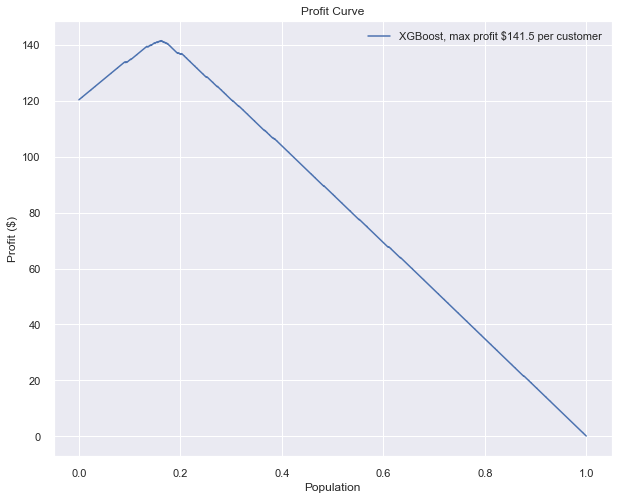

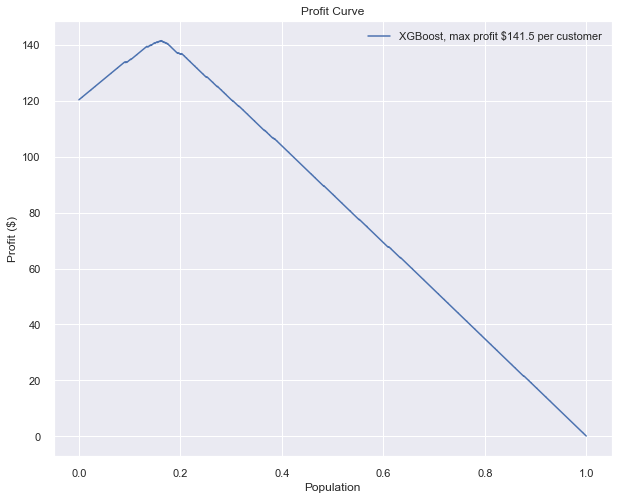

In [273]:
y_proba = xgb.predict_proba(X_test)[:,1]
thresholds = sorted(y_proba, reverse=True)

costbenefit_mat = np.array([[0, 0],
                        [-150, 175]])
profits = []

for T in thresholds:
    y_pred = (y_proba>T).astype(int)
    confusion_mat = standard_confusion_matrix(y_test, y_pred)
    profit = sum(sum(confusion_mat * costbenefit_mat)) / len(y_test)
    profits.append(profit)

max_profit = max(profits)
plt.figure(figsize=(10,8))
plt.plot(np.linspace(0, 1, len(y_test)), profits, label = '{}, max profit ${} per customer'.format("XGBoost", round(max_profit,2)))
plt.title('Profit Curve')
plt.legend()
plt.ylabel('Profit ($)')
plt.xlabel('Population')

# Explainability Using Shappash

In [274]:
from shapash.explainer.smart_explainer import SmartExplainer

In [275]:
ecommerce_dict = {}

In [276]:
X_train.head()

Tenure  CityTier  HourSpendOnApp  NumberOfDeviceRegistered  \
CustomerID                                                               
51187            9         1               2                         3   
53146            7         1               4                         3   
50609            0         1               2                         1   
55203           18         1               3                         5   
54134           16         1               3                         4   

            SatisfactionScore  NumberOfAddress  Complain  \
CustomerID                                                 
51187                       3                2         0   
53146                       3                6         0   
50609                       2                2         0   
55203                       3                5         0   
54134                       3                7         0   

            OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
CustomerID                                                        
51187                                16           1           1   
53146                                20           1           2   
50609                                12           1           1   
55203                                15           1           2   
54134                                15           2           5   

            DaySinceLastOrder  CashbackAmount  avg_cashback_per_order  \
CustomerID                                                              
51187                       0          115.14                  115.14   
53146                       6          286.84                  143.42   
50609                       3          154.72                  154.72   
55203                       4          156.62                   78.31   
54134                      15          313.80                   62.76   

            distance  PreferredPaymentMode_COD  \
CustomerID                                       
51187              2                         0   
53146              1                         0   
50609              1                         0   
55203              2                         0   
54134              1                         0   

            PreferredPaymentMode_Debit Card  PreferredPaymentMode_E wallet  \
CustomerID                                                                   
51187                                     0                              0   
53146                                     0                              0   
50609                                     0                              0   
55203                                     1                              0   
54134                                     1                              0   

            PreferredPaymentMode_UPI  PreferedOrderCat_Grocery  \
CustomerID                                                       
51187                              0                         0   
53146                              0                         1   
50609                              0                         0   
55203                              0                         0   
54134                              0                         0   

            PreferedOrderCat_Laptop & Accessory  \
CustomerID                                        
51187                                         0   
53146                                         0   
50609                                         1   
55203                                         0   
54134                                         0   

            PreferedOrderCat_Mobile Phone  PreferedOrderCat_Others  \
CustomerID                                                           
51187                                   1                        0   
53146                                   0                        0   
50609                                   0                        0   
55203                

Tenure  CityTier  HourSpendOnApp  NumberOfDeviceRegistered  \
CustomerID                                                               
51187            9         1               2                         3   
53146            7         1               4                         3   
50609            0         1               2                         1   
55203           18         1               3                         5   
54134           16         1               3                         4   

            SatisfactionScore  NumberOfAddress  Complain  \
CustomerID                                                 
51187                       3                2         0   
53146                       3                6         0   
50609                       2                2         0   
55203                       3                5         0   
54134                       3                7         0   

            OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
CustomerID                                                        
51187                                16           1           1   
53146                                20           1           2   
50609                                12           1           1   
55203                                15           1           2   
54134                                15           2           5   

            DaySinceLastOrder  CashbackAmount  avg_cashback_per_order  \
CustomerID                                                              
51187                       0          115.14                  115.14   
53146                       6          286.84                  143.42   
50609                       3          154.72                  154.72   
55203                       4          156.62                   78.31   
54134                      15          313.80                   62.76   

            distance  PreferredPaymentMode_COD  \
CustomerID                                       
51187              2                         0   
53146              1                         0   
50609              1                         0   
55203              2                         0   
54134              1                         0   

            PreferredPaymentMode_Debit Card  PreferredPaymentMode_E wallet  \
CustomerID                                                                   
51187                                     0                              0   
53146                                     0                              0   
50609                                     0                              0   
55203                                     1                              0   
54134                                     1                              0   

            PreferredPaymentMode_UPI  PreferedOrderCat_Grocery  \
CustomerID                                                       
51187                              0                         0   
53146                              0                         1   
50609                              0                         0   
55203                              0                         0   
54134                              0                         0   

            PreferedOrderCat_Laptop & Accessory  \
CustomerID                                        
51187                                         0   
53146                                         0   
50609                                         1   
55203                                         0   
54134                                         0   

            PreferedOrderCat_Mobile Phone  PreferedOrderCat_Others  \
CustomerID                                                           
51187                                   1                        0   
53146                                   0                        0   
50609                                   0                        0   
55203                

In [277]:
ecommerce_dict = {
    "Tenure" : "Tenure of customer in organization",
    "PreferredLoginDevice" : "Preferred login device of customer",
    "CityTier" : "City tier",
    "WarehouseToHome" : "Distance in between warehouse to home of customer",
    "PreferredPaymentMode" :"Preferred payment method of customer",
    "HourSpendOnApp" : "Number of hours spend on mobile application or website",
    "NumberOfDeviceRegistered" : "Total number of deceives is registered on particular customer",
    "PreferedOrderCat" : "Preferred order category of customer in last month",
    "SatisfactionScore" : "Satisfactory score of customer on service",
    "MaritalStatus" : "Marital status of customer",
    "NumberOfAddress" : "Total number of added added on particular customer",
    "Complain" : "Any complaint has been raised in last month",
    "OrderAmountHikeFromlastYear" : "Percentage increases in order from last year",
    "CouponUsed" : "Total number of coupon has been used in last month",
    "OrderCount" : "Total number of orders has been places in last month",
    "DaySinceLastOrder" : "Day Since last order by customer",
    "CashbackAmount" : "Average cashback in last month"
}

In [278]:
features_groups  = {
    "profile":["Tenure",
               "CityTier",
               "distance",
               "HourSpendOnApp"],
    "Status":["MaritalStatus_Single",
              "MaritalStatus_Married",
              "MaritalStatus_Married"],
    "Number_Device_Address":["NumberOfDeviceRegistered",
                             "NumberOfAddress"],
    "Preferred_Login":["PreferredLoginDevice_Mobile Phone"],
    "Satisfaction":["SatisfactionScore",
                    "Complain"],
    "Order":["OrderAmountHikeFromlastYear",
             "CouponUsed",
             "OrderCount",
             "DaySinceLastOrder"],
    "Cashback":["CashbackAmount","avg_cashback_per_order"],
    "Payment":["PreferredPaymentMode_COD",
              "PreferredPaymentMode_Debit Card",
              "PreferredPaymentMode_E wallet",
              "PreferredPaymentMode_UPI",
              "PreferedOrderCat_Grocery",
              "PreferedOrderCat_Laptop & Accessory",
              "PreferedOrderCat_Mobile Phone",
              "PreferedOrderCat_Others"]
}

groups_labels = {
    'profile': 'Customer Profile',
    'Status' : 'Status Marital Customer',
    'Number_Device_Address': 'Number of Device and Address of Customer',
    'Preferred_Login': 'Preferred Login of Customer',
    'Satisfaction': 'Statisfaction and Compalin of Customer',
    'Order': 'Order History of Customer',
    'Cashback': 'Cashback History',
    'Payment': 'Preferred Payment'
}

ecommerce_dict.update(groups_labels)

ecommerce_dict

{'Tenure': 'Tenure of customer in organization',
 'PreferredLoginDevice': 'Preferred login device of customer',
 'CityTier': 'City tier',
 'WarehouseToHome': 'Distance in between warehouse to home of customer',
 'PreferredPaymentMode': 'Preferred payment method of customer',
 'HourSpendOnApp': 'Number of hours spend on mobile application or website',
 'NumberOfDeviceRegistered': 'Total number of deceives is registered on particular customer',
 'PreferedOrderCat': 'Preferred order category of customer in last month',
 'SatisfactionScore': 'Satisfactory score of customer on service',
 'MaritalStatus': 'Marital status of customer',
 'NumberOfAddress': 'Total number of added added on particular customer',
 'Complain': 'Any complaint has been raised in last month',
 'OrderAmountHikeFromlastYear': 'Percentage increases in order from last year',
 'CouponUsed': 'Total number of coupon has been used in last month',
 'OrderCount': 'Total number of orders has been places in last month',
 'DaySinc

{'Tenure': 'Tenure of customer in organization',
 'PreferredLoginDevice': 'Preferred login device of customer',
 'CityTier': 'City tier',
 'WarehouseToHome': 'Distance in between warehouse to home of customer',
 'PreferredPaymentMode': 'Preferred payment method of customer',
 'HourSpendOnApp': 'Number of hours spend on mobile application or website',
 'NumberOfDeviceRegistered': 'Total number of deceives is registered on particular customer',
 'PreferedOrderCat': 'Preferred order category of customer in last month',
 'SatisfactionScore': 'Satisfactory score of customer on service',
 'MaritalStatus': 'Marital status of customer',
 'NumberOfAddress': 'Total number of added added on particular customer',
 'Complain': 'Any complaint has been raised in last month',
 'OrderAmountHikeFromlastYear': 'Percentage increases in order from last year',
 'CouponUsed': 'Total number of coupon has been used in last month',
 'OrderCount': 'Total number of orders has been places in last month',
 'DaySinc

In [279]:
from shapash import SmartExplainer

xpl = SmartExplainer(
model=xgb,
features_groups=features_groups,
features_dict=ecommerce_dict)

In [280]:
xpl.compile(x=X_test)

In [285]:
app = xpl.run_app(port=8050,host="localhost")

Dash is running on http://localhost:8050/

Dash is running on http://localhost:8050/



INFO:root:Your Shapash application run on http://localhost:8050/
INFO:root:Your Shapash application run on http://localhost:8050/
INFO:root:Use the method .kill() to down your app.


Dash is running on http://localhost:8050/

Dash is running on http://localhost:8050/

Dash is running on http://localhost:8050/

Dash is running on http://localhost:8050/



INFO:root:Use the method .kill() to down your app.


Dash is running on http://localhost:8050/

Dash is running on http://localhost:8050/

Dash is running on http://localhost:8050/

Dash is running on http://localhost:8050/

Dash is running on http://localhost:8050/



INFO:shapash.webapp.smart_app:Dash is running on http://localhost:8050/



 * Serving Flask app "shapash.webapp.smart_app" (lazy loading)
Dash is running on http://localhost:8050/



INFO:shapash.webapp.smart_app:Dash is running on http://localhost:8050/



 * Serving Flask app "shapash.webapp.smart_app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://localhost:8050/ (Press CTRL+C to quit)


 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://localhost:8050/ (Press CTRL+C to quit)
INFO:werkzeug:127.0.0.1 - - [15/Oct/2022 10:44:35] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/Oct/2022 10:44:35] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/Oct/2022 10:44:35] "GET /assets/material-icons.css?m=1665800219.8301313 HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/Oct/2022 10:44:35] "GET /assets/material-icons.css?m=1665800219.8301313 HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/Oct/2022 10:44:35] "GET /assets/style.css?m=1665800219.9317641 HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/Oct/2022 10:44:35] "GET /assets/style.css?m=1665800219.9317641 HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/Oct/2022 10:44:35] "GET /_dash-component-suites/dash/deps/polyfill@7.v2_6_2m1665800208.12.1.min.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/Oct/2022 10:44:35] "GET /_dash-component-suites/dash/deps/polyfill@7.v2_6_2m1665800208.12.1.min.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.

INFO:werkzeug:127.0.0.1 - - [15/Oct/2022 10:44:38] "GET /_dash-component-suites/dash/dash_table/async-highlight.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/Oct/2022 10:44:38] "GET /_dash-component-suites/dash/dash_table/async-highlight.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/Oct/2022 10:44:38] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/Oct/2022 10:44:38] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/Oct/2022 10:44:38] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/Oct/2022 10:44:38] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/Oct/2022 10:44:38] "GET /_dash-component-suites/dash/dash_table/async-table.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/Oct/2022 10:44:38] "GET /_dash-component-suites/dash/dash_table/async-table.js HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/Oct/2022 10:

INFO:werkzeug:127.0.0.1 - - [15/Oct/2022 10:56:48] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/Oct/2022 10:56:48] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/Oct/2022 11:00:12] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/Oct/2022 11:00:12] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/Oct/2022 11:00:12] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/Oct/2022 11:00:12] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/Oct/2022 11:00:12] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [15/Oct/2022 11:00:12] "POST /_dash-update-component HTTP/1.1" 200 -


In [282]:
help(SmartExplainer)

   Use a production WSGI server instead.
   Use a production WSGI server instead.
Help on class SmartExplainer in module shapash.explainer.smart_explainer:

class SmartExplainer(builtins.object)
 |  SmartExplainer(model, backend='shap', preprocessing=None, postprocessing=None, features_groups=None, features_dict=None, label_dict=None, title_story: str = None, palette_name=None, colors_dict=None, **kwargs)
 |  
 |  The SmartExplainer class is the main object of the Shapash library.
 |  It allows the Data Scientists to perform many operations to make the
 |  results more understandable :
 |  linking encoders, models, predictions, label dict and datasets.
 |  SmartExplainer users have several methods which are described below.
 |  
 |  Parameters
 |  ----------
 |  model : model object
 |      model used to consistency check. model object can also be used by some method to compute
 |      predict and predict_proba values
 |  backend : str or shpash.backend object (default: 'shap')
 |     

Help on class SmartExplainer in module shapash.explainer.smart_explainer:

class SmartExplainer(builtins.object)
 |  SmartExplainer(model, backend='shap', preprocessing=None, postprocessing=None, features_groups=None, features_dict=None, label_dict=None, title_story: str = None, palette_name=None, colors_dict=None, **kwargs)
 |  
 |  The SmartExplainer class is the main object of the Shapash library.
 |  It allows the Data Scientists to perform many operations to make the
 |  results more understandable :
 |  linking encoders, models, predictions, label dict and datasets.
 |  SmartExplainer users have several methods which are described below.
 |  
 |  Parameters
 |  ----------
 |  model : model object
 |      model used to consistency check. model object can also be used by some method to compute
 |      predict and predict_proba values
 |  backend : str or shpash.backend object (default: 'shap')
 |      Select which computation method to use in order to compute contributions
 |      

 * Debug mode: off


 * Debug mode: off


INFO:werkzeug: * Running on http://192.168.0.14:8050/ (Press CTRL+C to quit)
INFO:werkzeug: * Running on http://192.168.0.14:8050/ (Press CTRL+C to quit)
